## Micro-Credit Defaulter 

#### Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. Microfinance services(MFS) becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The MFS provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 

Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing 70 billion USD in outstanding loans and a global outreach of 200 million clients.

**We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber.** 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 

They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

**The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers.**


Aim : Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan.

In [1]:
#importing the dataset

import pandas as pd
pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("Data file.csv")
data.head(10)

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
5,6,1,35819I70783,568.0,2257.362667,2261.460000,368.13,380.13,2.0,0.0,1539,4,10.0,6156.0,1539.0,15.40,8,0,11744,1539.0,55.90,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,11.000000,8.333333,UPW,2016-07-02
6,7,1,96759I84459,545.0,2876.641667,2883.970000,335.75,402.90,13.0,0.0,5787,1,0.0,5787.0,5787.0,277.80,1,0,5787,5787.0,277.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-07-05
7,8,1,09832I90846,768.0,12905.000000,17804.150000,900.35,2549.11,4.0,55.0,3178,3,3.0,10404.0,3178.0,36.00,9,3,26095,3178.0,36.00,0.0,0.0,1,0,3,18,6.0,0.0,7.0,42,6,0.0,6.000000,3.857143,UPW,2016-08-05
8,9,1,59772I84450,1191.0,90.695000,90.695000,2287.50,2287.50,1.0,0.0,1539,4,1.0,6164.0,1539.0,39.90,4,1,6164,1539.0,39.90,0.0,0.0,0,0,4,24,6.0,0.0,4.0,24,6,0.0,2.666667,2.666667,UPW,2016-06-15
9,10,1,56331I70783,536.0,29.357333,29.357333,612.96,612.96,11.0,0.0,773,1,0.0,773.0,773.0,86.80,1,0,773,773.0,86.80,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-06-08


### Exploratory Data Analysis

In [2]:
data.shape

(209593, 37)

We have 209593 records in this dataset. We have 209593 rows and 37 columns in the dataset.

In [3]:
data.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

We have string, integer and float type of data in the dataset.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

We have 209593 non null values in the dataset.

In [5]:
data.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

We can see that the column 'pcirlce' has only one value for all the records. So we can drop this column from the dataset.

In [6]:
data.drop('pcircle', axis = 1, inplace = True)

In [7]:
data.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pdate'],
      dtype='object')

These are the columns present in the dataset. We can see that the first column is just index to identify each records. So we can drop that column from the dataset.

In [8]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

### Features in Dataset(Independent Variable)


`msisdn` - mobile number of user

`aon` - age on cellular network in days

`daily_decr30` - Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)

`daily_decr90` - Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)

`rental30` - Average main account balance over last 30 days

`rental90` - Average main account balance over last 90 days

`last_rech_date_ma` - Number of days till last recharge of main account

`last_rech_date_da` - Number of days till last recharge of data account

`last_rech_amt_ma` - Amount of last recharge of main account (in Indonesian Rupiah)

`cnt_ma_rech30` - Number of times main account got recharged in last 30 days

`fr_ma_rech30` - Frequency of main account recharged in last 30 days

`sumamnt_ma_rech30` - Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)

`medianamnt_ma_rech30` - Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

`medianmarechprebal30` - Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)

`cnt_ma_rech90` - Number of times main account got recharged in last 90 days

`fr_ma_rech90` - Frequency of main account recharged in last 90 days

`sumamnt_ma_rech90` - Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

`medianamnt_ma_rech90` - Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

`medianmarechprebal90` - Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

`cnt_da_rech30` - Number of times data account got recharged in last 30 days

`fr_da_rech30` - Frequency of data account recharged in last 30 days

`cnt_da_rech90` - Number of times data account got recharged in last 90 days

`fr_da_rech90` - Frequency of data account recharged in last 90 days

`cnt_loans30` - Number of loans taken by user in last 30 days

`amnt_loans30` - Total amount of loans taken by user in last 30 days

`maxamnt_loans30` - maximum amount of loan taken by the user in last 30 days

`medianamnt_loans30` - Median of amounts of loan taken by the user in last 30 days

`cnt_loans90` - Number of loans taken by user in last 90 days

`amnt_loans90` - Total amount of loans taken by user in last 90 days

`maxamnt_loans90` - maximum amount of loan taken by the user in last 90 days

`medianamnt_loans90` - Median of amounts of loan taken by the user in last 90 days

`payback30` - Average payback time in days over last 30 days

`payback90` - Average payback time in days over last 90 days

`pcircle` - telecom circle

`pdate` - date


### Target in dataset(Dependent Variable)

`label` - Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan. Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.

### Exploring the Categorical Variables in the dataset

In [9]:
#Categorical columns in the dataset
for i in data.columns:
    if data[i].dtypes =='O':
        print(i)
        print('*'*50)
        print(data[i].nunique())
        print(data[i].unique())
        missing = data[i].isnull().sum()
        print("Missing Value Count : ",missing)
        total = 1168
        missing_per = (missing/total)*100
        print("Missing Data Percent : ",missing_per)
        print("^"*50)

msisdn
**************************************************
186243
['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339']
Missing Value Count :  0
Missing Data Percent :  0.0
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
pdate
**************************************************
82
['2016-07-20' '2016-08-10' '2016-08-19' '2016-06-06' '2016-06-22'
 '2016-07-02' '2016-07-05' '2016-08-05' '2016-06-15' '2016-06-08'
 '2016-06-12' '2016-06-20' '2016-06-29' '2016-06-16' '2016-08-03'
 '2016-06-24' '2016-07-04' '2016-07-03' '2016-07-01' '2016-08-08'
 '2016-06-26' '2016-06-23' '2016-07-06' '2016-07-09' '2016-06-10'
 '2016-06-07' '2016-06-27' '2016-08-11' '2016-06-30' '2016-06-19'
 '2016-07-26' '2016-08-14' '2016-06-14' '2016-06-21' '2016-06-25'
 '2016-06-28' '2016-06-11' '2016-07-27' '2016-07-23' '2016-08-16'
 '2016-08-15' '2016-06-02' '2016-06-05' '2016-08-02' '2016-07-28'
 '2016-07-18' '2016-08-18' '2016-07-16' '2016-07-29' '2016-07-21'
 '2016-06-03' '2016-

We can see that the column 'msisdn' includes the user mobile number. So, we can drop this column from the dataset as it is not making any contribution on our target.

In [10]:
data.drop("msisdn", axis = 1, inplace = True)

### Feature Engineering

We convert the data in column 'pdate' to datetime format and get the required data for analysis and model building from this column data.

In [11]:
data['pdate'] = pd.to_datetime(data['pdate'])

Now we can separate the day, month and year from the column 'pdate' and add them to the dataset as new columns. 

In [12]:
data['pday'] = data['pdate'].dt.day
data['pmonth'] = data['pdate'].dt.month

In [13]:
data['pdate'].dt.year.unique()

array([2016], dtype=int64)

We can see that the data is given only for the year 2016. So, we don't have to consider the year in date as it is same for all the records.

Now we can drop the column 'pdate' as we have extracted all the required data from this column and included them in the dataset as new columns.

In [14]:
data.drop("pdate", axis = 1, inplace = True)

### Checking for Missing Values

label                   0
medianamnt_loans30      0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
cnt_loans90             0
medianmarechprebal90    0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pday                    0
cnt_da_rech30           0
medianamnt_ma_rech90    0
aon                     0
last_rech_amt_ma        0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
cnt_ma_rech30           0
sumamnt_ma_rech90       0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
pmonth                  0
dtype: int64


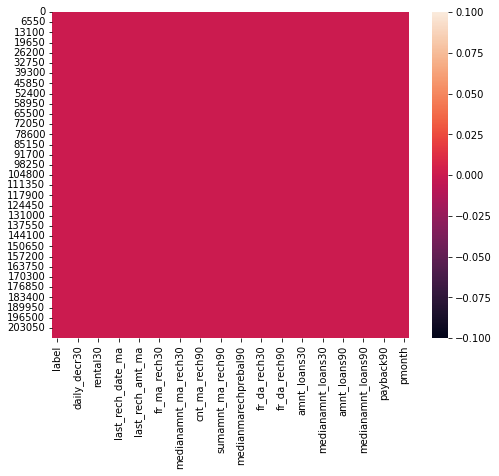

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = [8,6])
sns.heatmap(data.isnull())
print(data.isnull().sum().sort_values(ascending = False))

We don't have any missing values in the dataset.

### Data Visualization

### Univariate Analysis

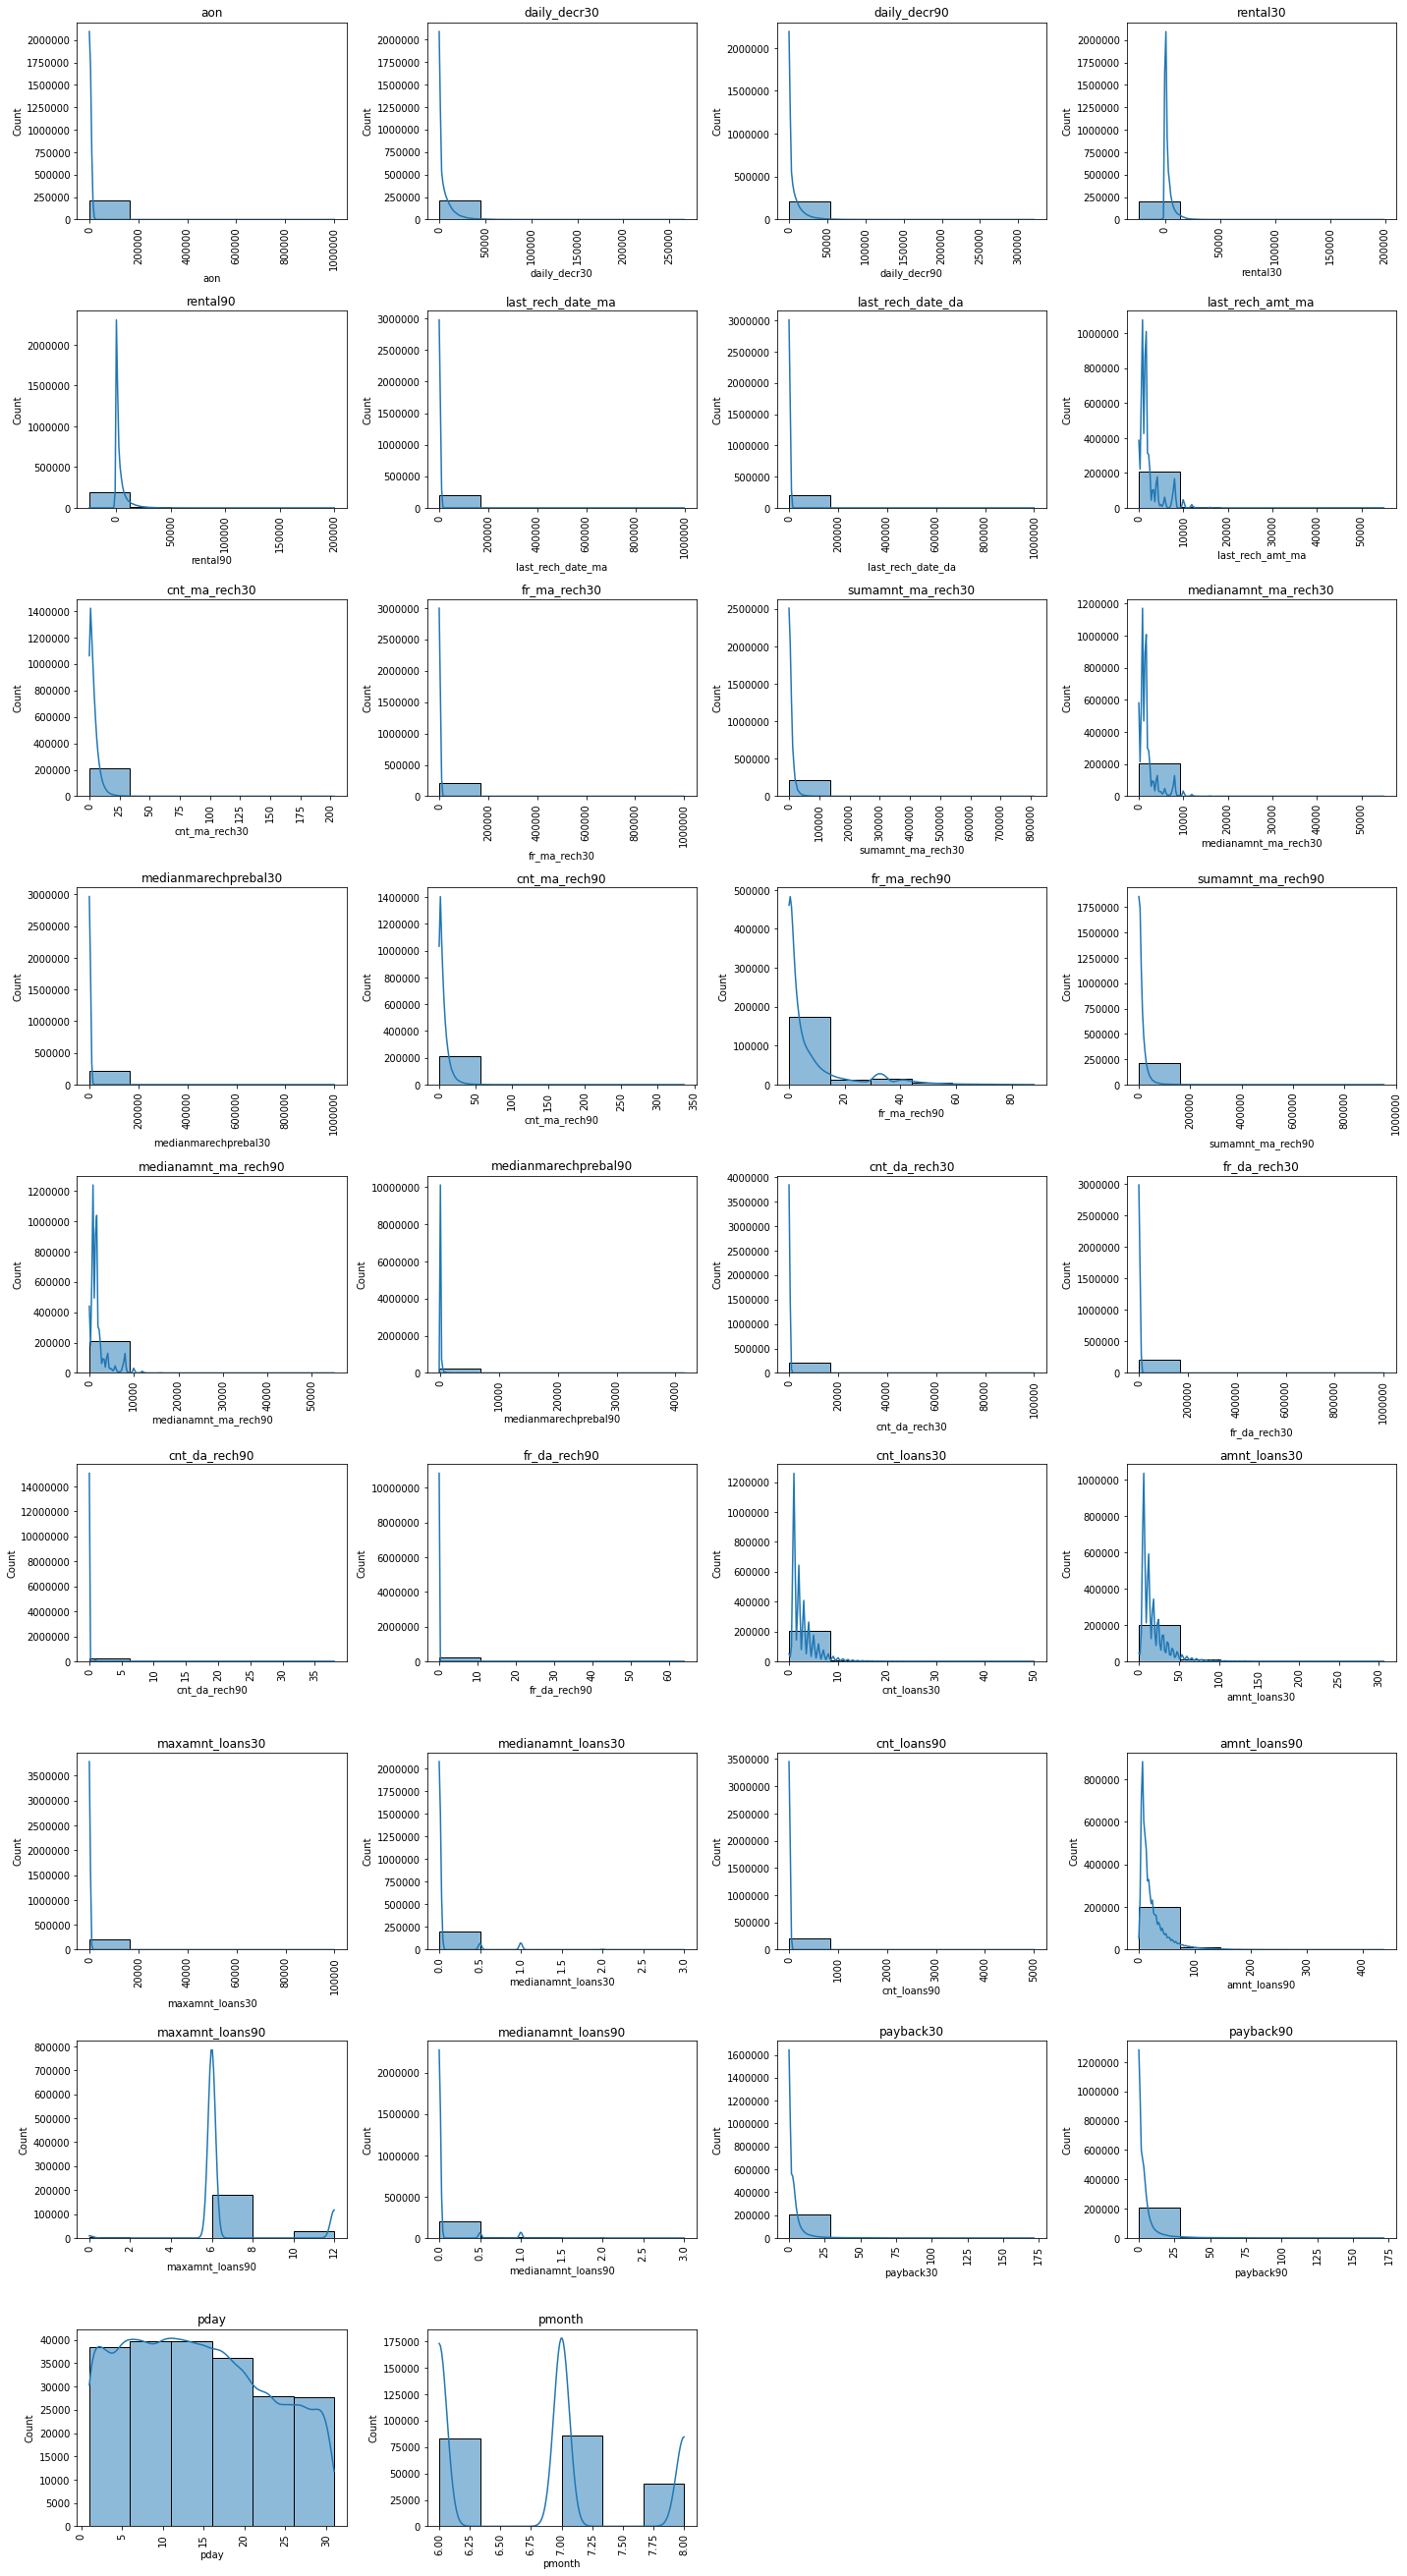

In [89]:
#plotting the numerical variables in the dataset. 
import numpy as np
plt.figure(figsize = [20,40])
a = 1
for i in data.drop('label', axis = 1).columns:
    plt.subplot(10,4,a)
    sns.histplot(x =i,data = data,bins =6,kde=True)
    plt.xticks(rotation = 90)
    plt.title("{}".format(i))
    ax = plt.gca()
    ax.ticklabel_format(style='plain')
    a+= 1
plt.tight_layout()

1    183431
0     26162
Name: label, dtype: int64


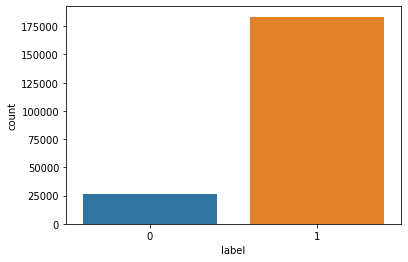

In [94]:
print(data['label'].value_counts().sort_values(ascending = False))
sns.countplot(data['label'])
plt.show()

Observations:
    
* The average age on cellular network in days for customers ranging between -48 to 1.7 lakh.
* Most customers have spent less tha Rs. 44,000 from main account averaged over last 30 and spent more than Rs. 53,000 over last 90 days.
* The average main account balance of most of customers are ranging between Rs. -23000 to Rs. 14000 over last 30 days and Rs. -25000 to Rs. 13000 over last 90 days.
* The average number of days from recharge of main account and data account for most of customers ranging between -29 to 1.67 lakh.
* Most customers have recharged their main account for an amount ranging between Rs. 0 to Rs. 9000.
* The number of times customers recharged their main account in last 30 days is ranging between 0 to 34 times and in last 90 days is ranging between 0 to 56 times
* Frequecy of main account recharge for most of the customers in last 30 days is ranging between 0 to 1.67 lakh and in last 90 days is ranging between 0 to 14.67.
* Total amount of recharge for most of the customers for their main account in last 30 days is between the range Rs. 0 to Rs. 1.35 lakh and the median amount is between the range Rs. 0 to Rs. 9000. While the total amount of recharge for their main account in last 90 days is ranging between Rs. 0 to Rs. 1.59 lakh and the median amount of recharge is between Rs. 0 to Rs. 9000.
* The median main balance of most of customers just before recharge in last 30 days is between Rs-200 to Rs. 1.67 Lakh and in last 90 days is between Rs. 200 to Rs. 6700.
* Most of the customers have recharged their data account between 0 to 16000 times in last 30 days and 0 to 6.33 times in last 90 days.
* The frequency of recharge for most of customers for their data account is ranging from 0 to 1.67 lakh times in last 30 days and 0 to 11 times in last 90 days.
* Most customers have recharged their data account between 0 to 1.67 lakh times in last 30 days and 0 to 6 times in last 90 days.
* Number of loan taken by most customers is between 0 to 8 times in last 30 days and 0 to 832 times in last 90 days
* Total amount of loan taken by most customers is ranging between Rs. 0 to Rs. 51 in last 30 days and Rs. 73 in last 90 days.
* Maximum amount of loan taken by most customers is between Rs. 0 to Rs. 17000 in last 30 days and Rs. 2 in last 90 days.
* Median amount of loan taken by most customers is between Rs. 0 to Rs. 0.5 in last 30 days and Rs. 0.5 in last 90 days
* Average payback time for most customers is between the range 0 to 28 days over last 30 and 90 days.
* The data was collected for three months :- June, July and August. The data is uniform for most of the days but more number of data is collected from the beginning of the month and it is reducing towards the end of month.
* Most of the customers have paid back the credit amount within 5 days of issuing loan amount. 

### Bivariate Analysis

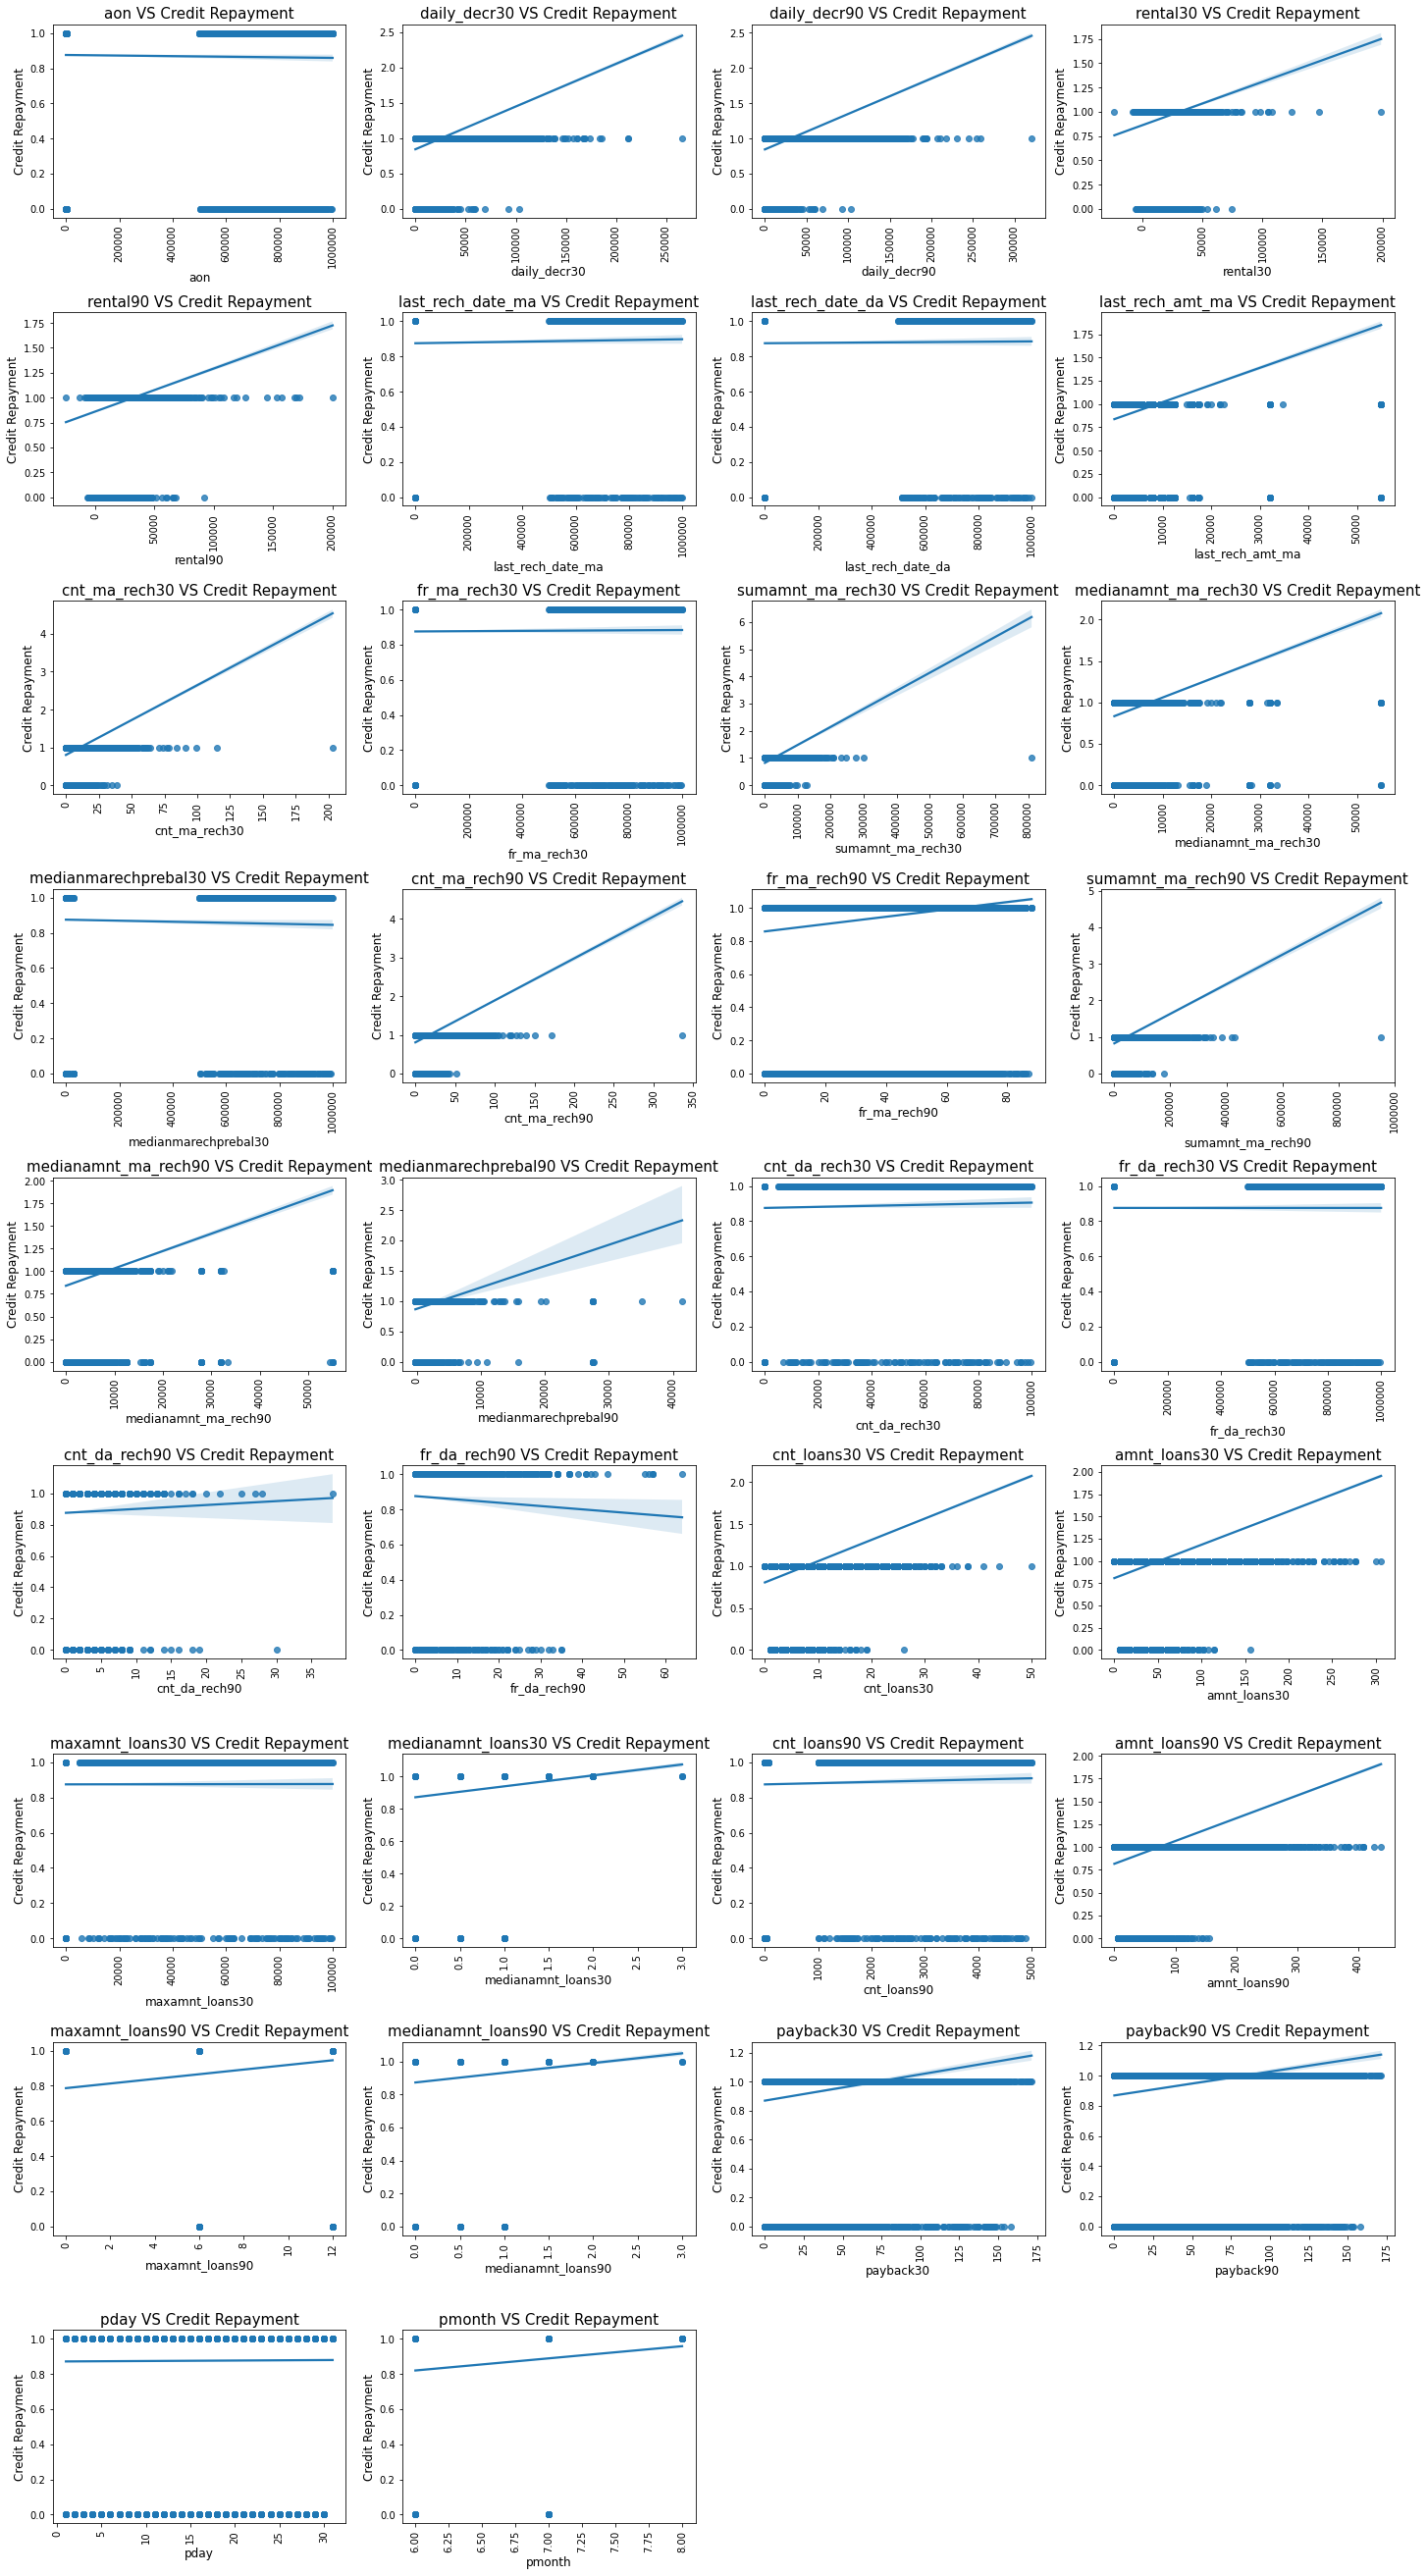

In [97]:
numeric_columns = list(data.drop(['label'],axis =1).select_dtypes(["int64","float64"]))
plt.figure(figsize = [20,40])
for i in range (len(numeric_columns)):
    plt.subplot(10,4,i+1)
    sns.regplot(x = data[numeric_columns[i]],y = data['label'], data = data)
    plt.xticks(rotation = 90)
    plt.title(f"{numeric_columns[i]} VS Credit Repayment",fontsize=15)
    plt.xlabel(numeric_columns[i],fontsize = 12)
    plt.ylabel('Credit Repayment', fontsize = 12)
    ax = plt.gca()
    ax.ticklabel_format(style='plain')
    plt.tight_layout()

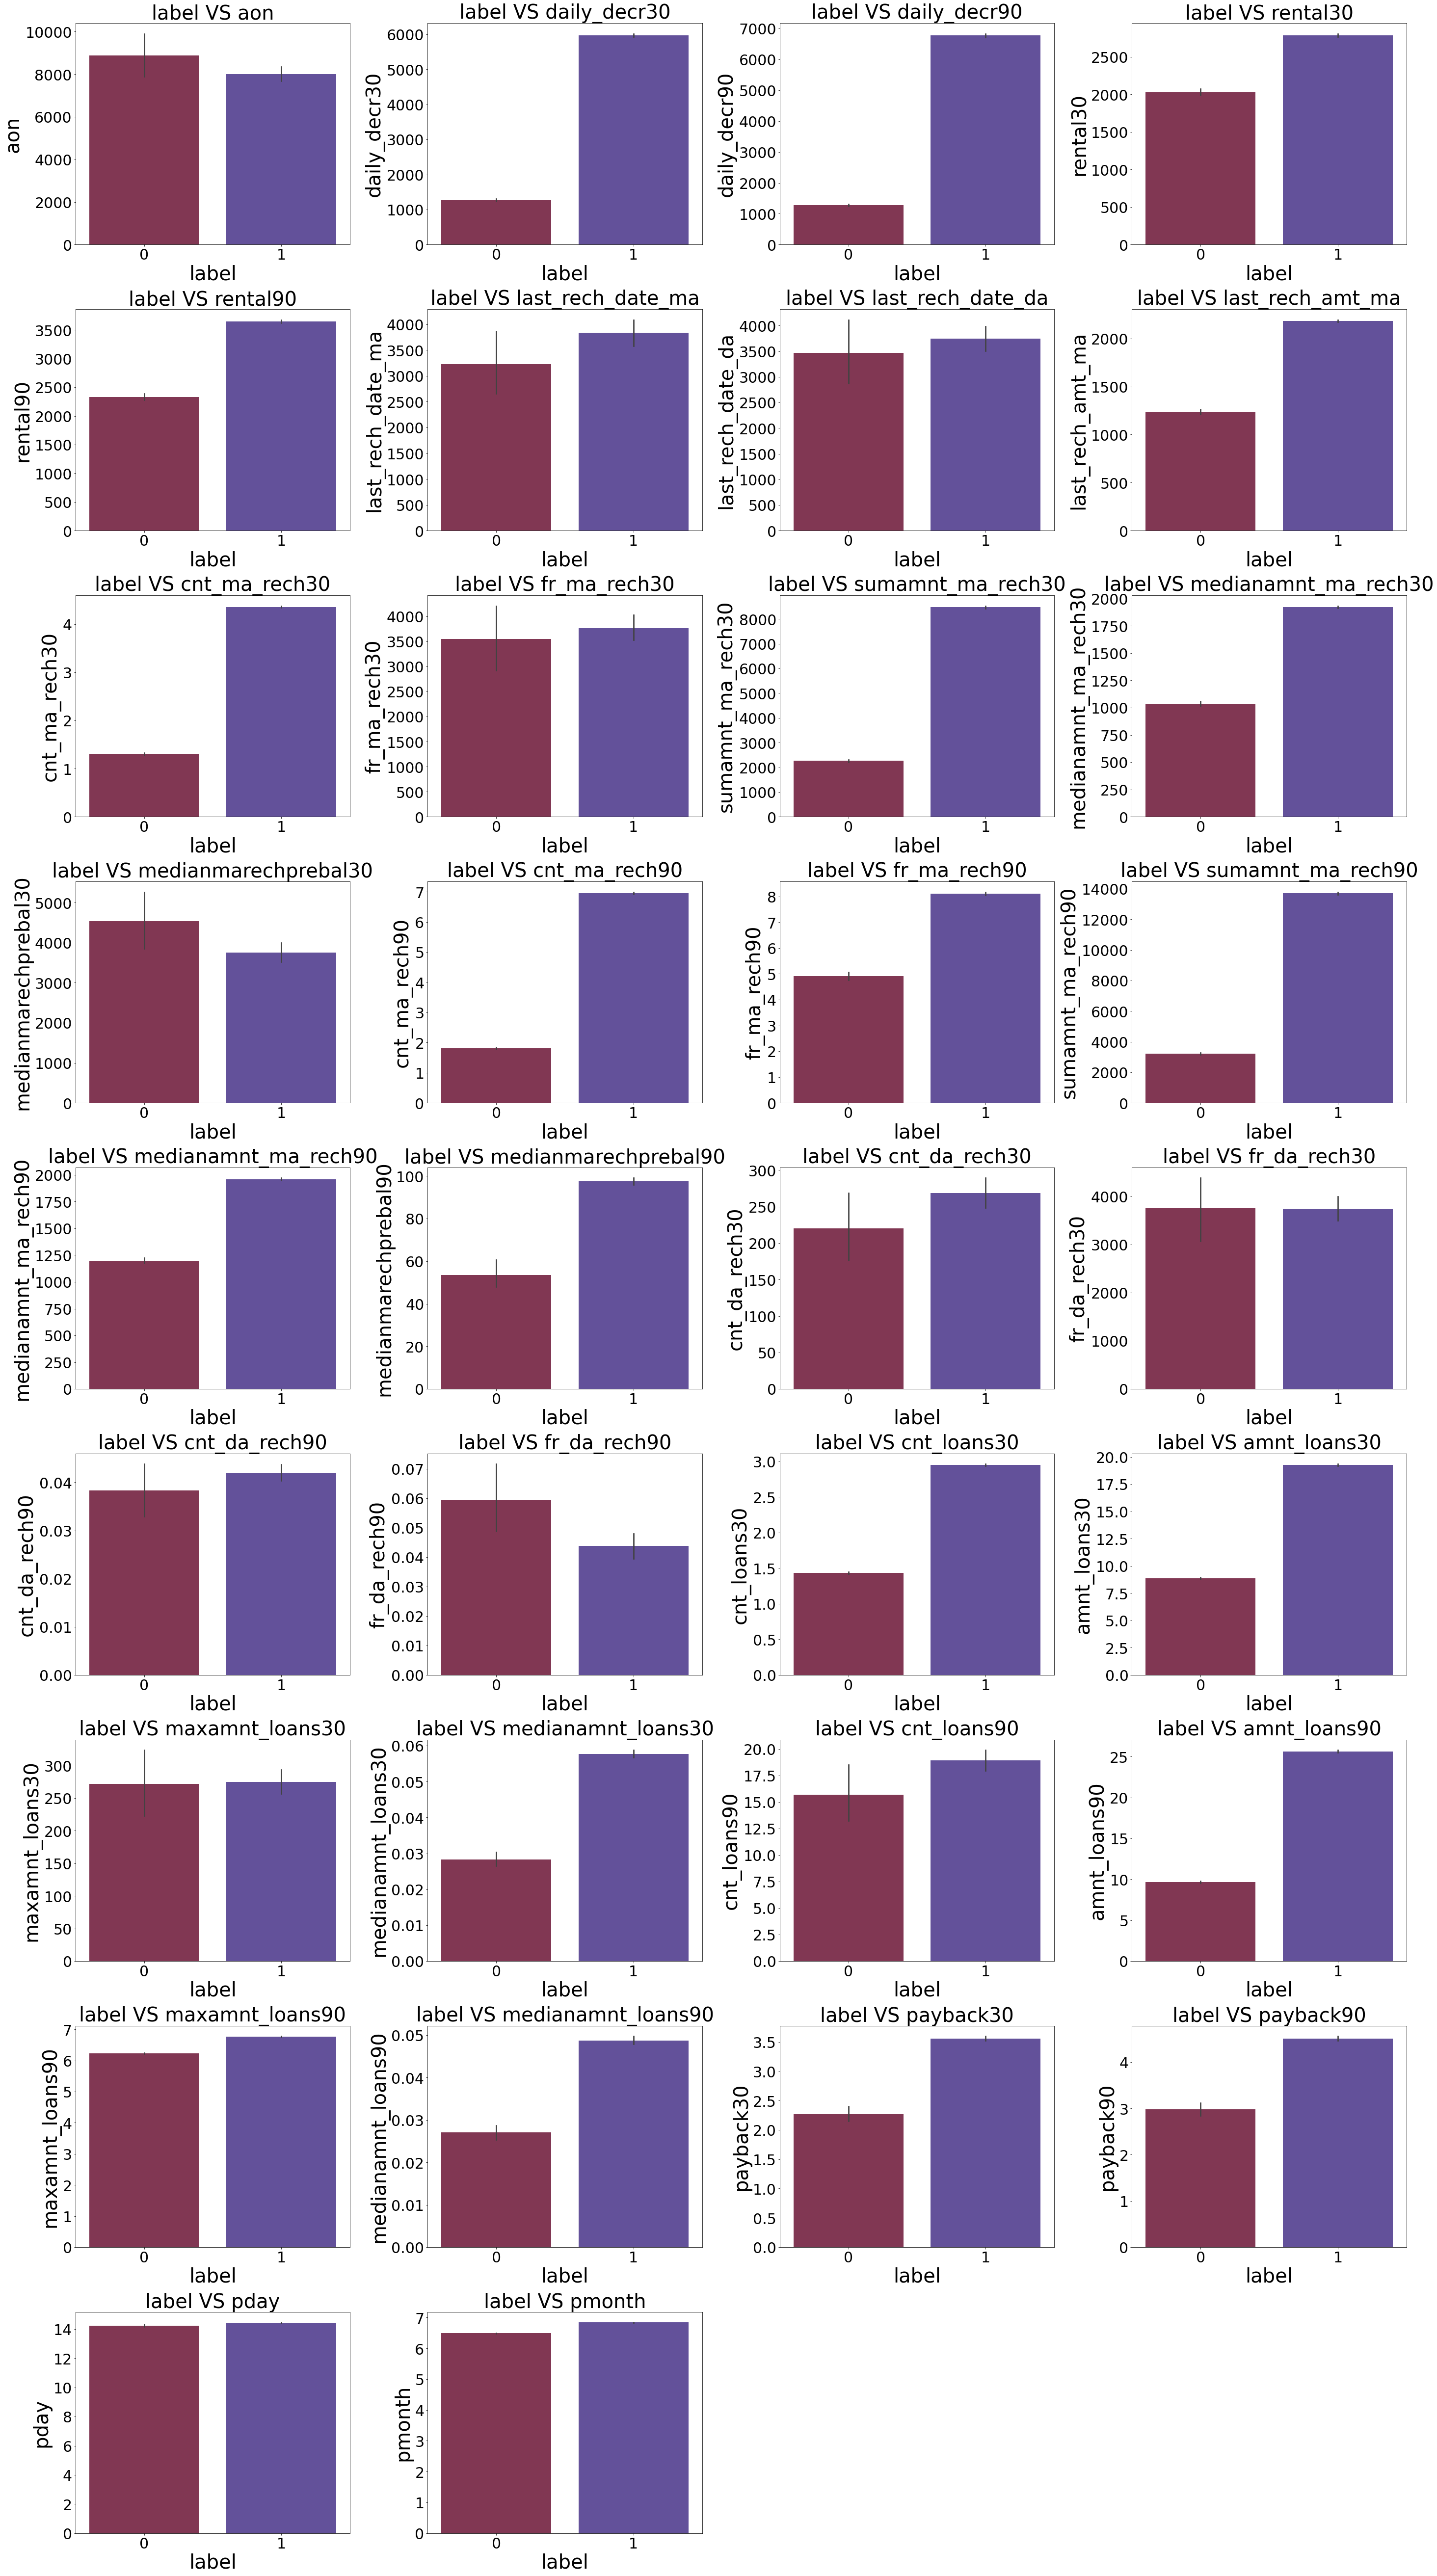

In [101]:
#barplot for numerical columns
plt.figure(figsize=(40,80))
for i in range(len(numeric_columns)):
    plt.subplot(10,4,i+1)
    sns.barplot(x=data['label'], y=data[numeric_columns[i]], palette="twilight_r")
    plt.title(f"label VS {numeric_columns[i]}",fontsize=40)
    plt.xticks(fontsize=30)  
    plt.yticks(fontsize=30)
    plt.xlabel('label',fontsize = 40)
    plt.ylabel(numeric_columns[i],fontsize = 40)
    plt.tight_layout()

Observations:
    
* Age of cellular network in days is not having much impact on the loan defaulters. The number of credit defaulters are slightly higher if the age of cellular network is higher.
* Customers who have least amount of spent from main account over last 30 and 90 days are more likely to be a defaulter.
* Customers who maintain low average main account balance over last 30 and 90 days are more likely to be a defaulter.
* Customers who had more number of recharges of main account and data account in past 30 and 90 days are not likely to be a defaulter.
* Customers who have recharged main account for higher amount have made the repayment of credit on time.
* Customers who are having frequent recharges in last 30 and 90 days are less likely to be a defaulter.
* Customers whose total amount and median amount of recharge in last 30 and 90 days is lower are more likely to be a defaulter.
* Customers who have higher median main balance just before last recharge in 30 days are more likely to be a defaulter, while the customers who have higher median main balance just before last recharge in 90 days are less likely to be a defaulter.
* Customers who have higher number of data account recharges in last 30 and 90 days are less likely to be a defaulter.
* Customers who have higher frequency in recharge of data account in last 90 days are more likely to be a defaulter, while the frequency of recharges of data account in last 30 days is not having much impact on identifying whether the customer will be a defaulter or not.
* Most number of customers who have taken most number of loans and higher amount of loan over the last 30 days and 90 days are less likely to be a defaulter.
* Maximum amount taken by customers as loan over the last 30 and 90 days are not providing much information on whether the customer would be a defaulter or not. 
* Customers who have higher median loan amount over the last 30 and 90 days are less likely to be defaulter.
* Customers who payback the amount in more days over the last 30 and 90 days are less likely to be a defaulter.
* The day and month of which the data was collected is not having much impact on the identifying whether the customer would be a defaulter or not.

### Statistical Summary

### Describe of the data

In [102]:
data.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,14.39894,6.797321
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,8.43890,0.741435
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,6.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,7.00000,6.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,14.00000,7.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,21.00000,7.000000
max,1.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,203.000000,999606.368132,810096.000000,55000.000000,999479.419319,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240107,38.000000,64.000000,50.000000,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,31.00000,8.000000


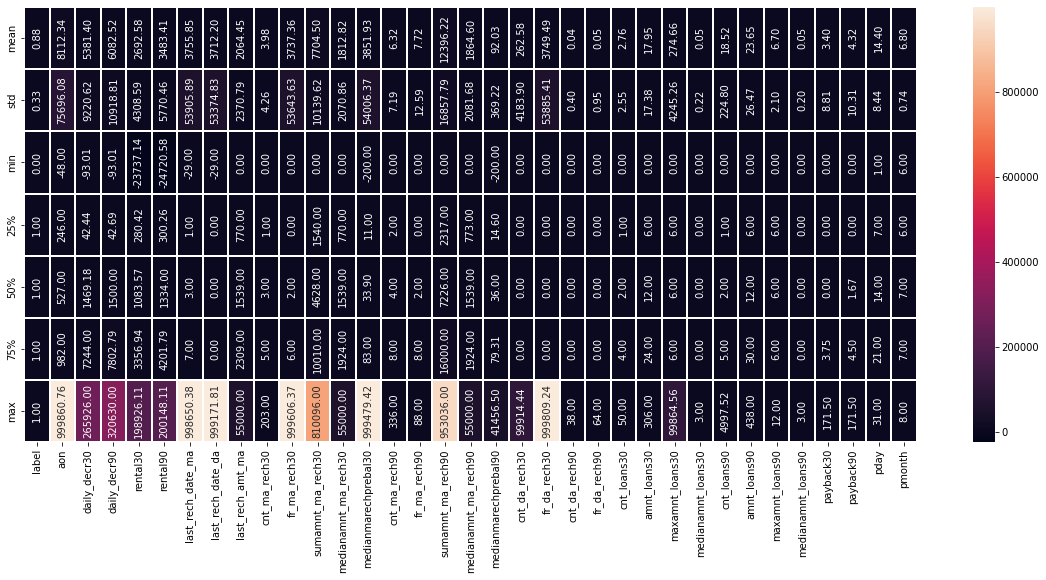

In [109]:
plt.figure(figsize=[20,8])
sns.heatmap(data.describe()[1:],annot=True,fmt='0.2f',linewidths=0.1, annot_kws={'rotation': 90})
plt.show()

Observations:
    
* All the columns except the column 'label' are having higher mean value than the median value. That means the data in these columns are skewed and data is not normally distributed.
* Except the columns ['label', 'medianamnt_loans30', 'maxamnt_loans90', 'medianamnt_loans90', 'pday', 'pmonth'], rest of the columns are having huge difference between the 75% and the maximum value. That means possible outliers are present in the data.

### Correlation

In [110]:
Correlation = data.corr()
Correlation

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183,0.006825,0.154949
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203,0.000662,-0.001863
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175,0.006477,0.518664
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800,-0.021508,0.539410
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147,0.036537,0.365699
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
medianamnt_loans90,0.035747,0.002771,-0.037305,-0.034686,-0.035489,-0.034122,0.002771,-0.002239,0.021004,-0.071451,-0.001292,-0.042244,0.022692,-0.001927,-0.072481,0.016964,-0.042386,0.031696,0.032453,-0.001365,-0.001623,-0.003094,-0.000949,-0.097871,-0.087989,0.009330,0.911604,-0.002571,-0.095160,0.032256,1.000000,-0.013388,-0.010443,-0.000253,0.011122
payback30,0.048336,0.001940,0.026915,0.019400,0.072974,0.067110,-0.002233,0.000077,-0.027369,0.043617,0.001455,0.000112,-0.018398,0.001516,0.011943,0.036817,-0.026409,-0.035640,-0.031760,-0.000471,0.001709,0.013430,0.000354,0.067842,0.060425,-0.001512,-0.006007,0.000587,0.052142,0.013376,-0.013388,1.000000,0.830363,0.031514,0.064807
payback90,0.049183,0.002203,0.047175,0.040800,0.095147,0.099501,-0.001583,0.000417,-0.014260,0.017362,0.000998,-0.012596,-0.002861,0.001811,-0.003141,0.077529,-0.029997,-0.023022,-0.031210,0.000382,-0.000725,0.024046,0.001226,0.033369,0.030901,-0.000915,0.003178,-0.000476,0.029653,0.029679,-0.010443,0.830363,1.000000,0.025545,0.131380
pday,0.006825,0.000662,0.006477,-0.021508,0.036537,0.008941,0.000560,0.000631,0.028883,0.068643,0.000927,0.056898,0.039341,-0.002546,0.031852,0.009488,0.027564,0.030696,0.002100,0.003139,0.000538,0.060286,0.039979,0.077170,0.070131,0.002531,-0.003479,0.001969,0.038509,0.015594,-0.000253,0.031514,0.025545,1.000000,-0.252241


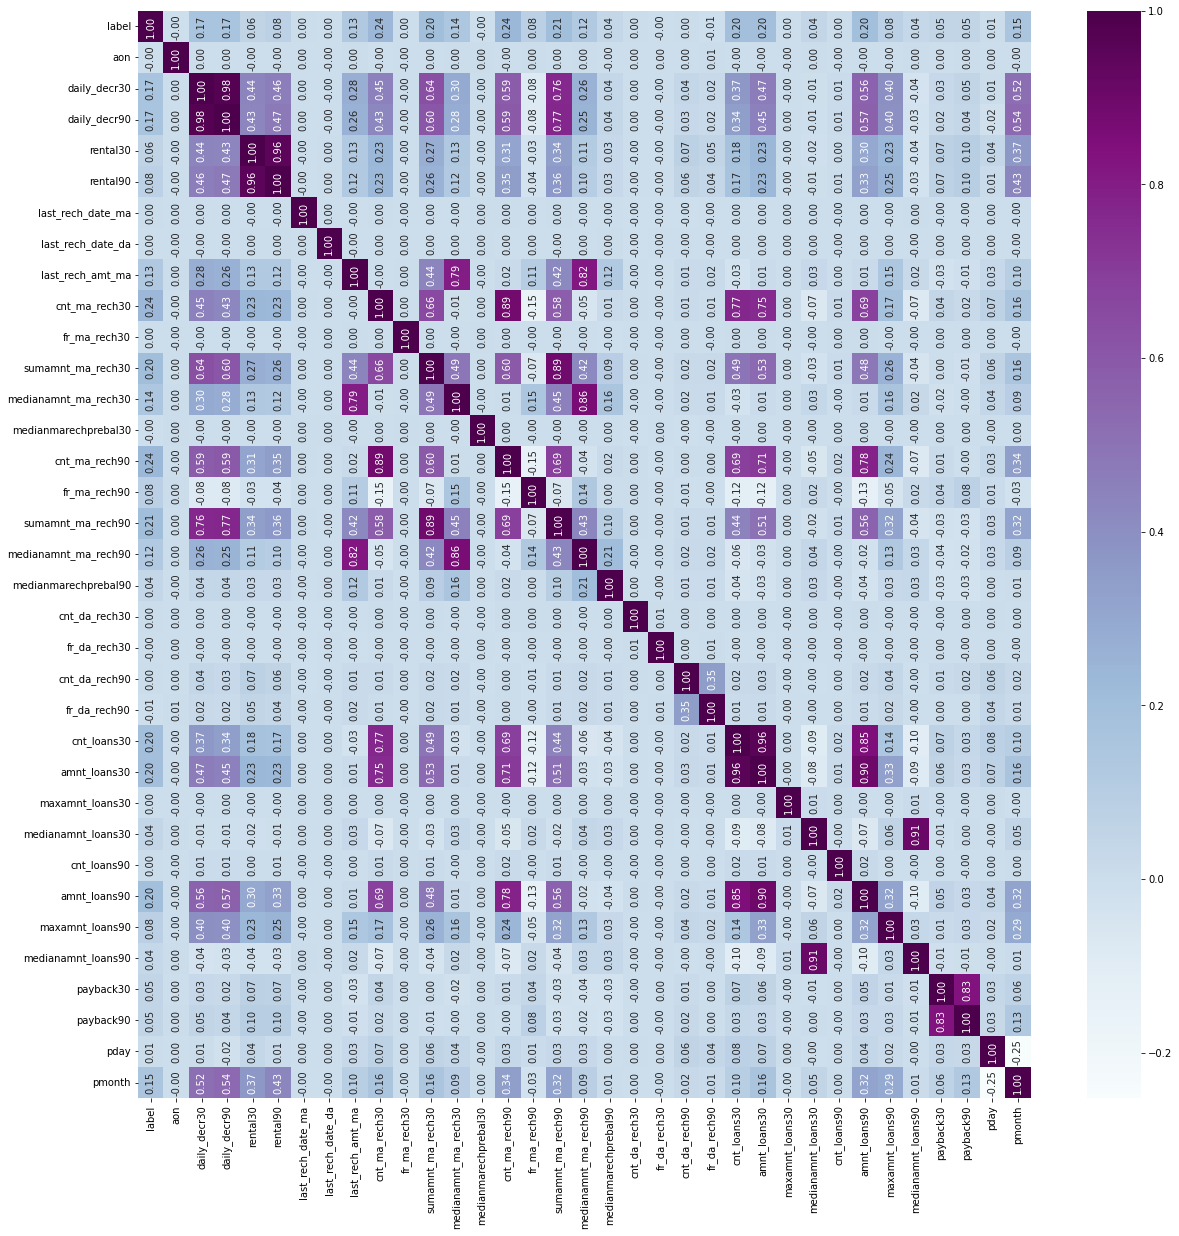

In [113]:
#Plotting the correlation of columns
plt.figure(figsize=[20,20])
sns.heatmap(Correlation,annot = True, fmt = '0.2f', annot_kws={'rotation': 90}, cmap='BuPu')
plt.show()

### Correlation with the Target column

Since there are more number of features in the dataset. It will be confusing to check the relation of all the variables to each other. So we can check the correlation of features to the target variable.

cnt_ma_rech30           0.237331
cnt_ma_rech90           0.236392
sumamnt_ma_rech90       0.205793
sumamnt_ma_rech30       0.202828
amnt_loans90            0.199788
amnt_loans30            0.197272
cnt_loans30             0.196283
daily_decr30            0.168298
daily_decr90            0.166150
pmonth                  0.154949
medianamnt_ma_rech30    0.141490
last_rech_amt_ma        0.131804
medianamnt_ma_rech90    0.120855
fr_ma_rech90            0.084385
maxamnt_loans90         0.084144
rental90                0.075521
rental30                0.058085
payback90               0.049183
payback30               0.048336
medianamnt_loans30      0.044589
medianmarechprebal90    0.039300
medianamnt_loans90      0.035747
pday                    0.006825
cnt_loans90             0.004733
cnt_da_rech30           0.003827
last_rech_date_ma       0.003728
cnt_da_rech90           0.002999
last_rech_date_da       0.001711
fr_ma_rech30            0.001330
maxamnt_loans30         0.000248
fr_da_rech

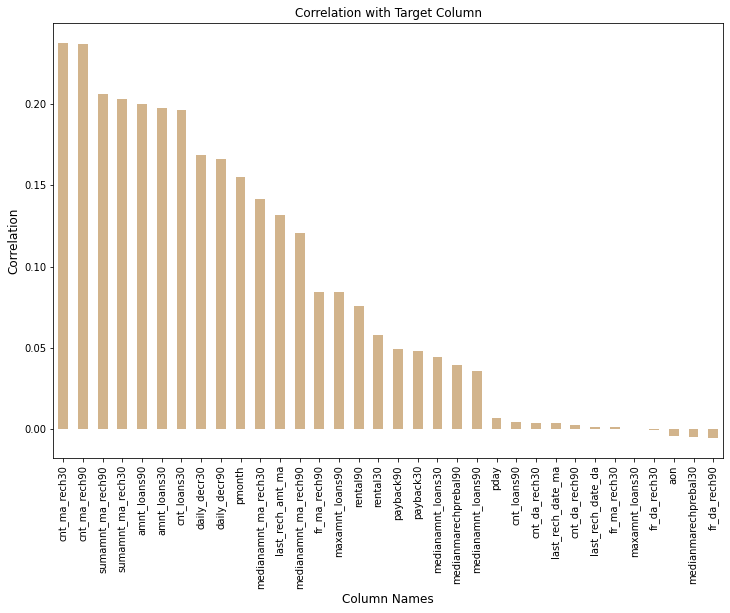

In [115]:
pd.set_option("display.max_rows", None)
print(Correlation['label'].drop('label').sort_values(ascending = False))
pd.set_option("display.max_rows", 10)
plt.figure(figsize = [12,8])
plt.subplot()
Correlation['label'].sort_values(ascending= False).drop('label').plot(kind = 'bar', color ='tan')
plt.xlabel('Column Names', fontsize = 12)
plt.ylabel('Correlation', fontsize = 12)
plt.title('Correlation with Target Column')
plt.show()

Observations:
    
* Most of the columns are having positive correlation to the target variable.
* The columns ['fr_da_rech30', 'aon', 'medianmarechprebal30', 'fr_da_rech90'] are having negative correlation to the target variable 'label'. Rest of the variables are having positive correlation to the target variable.
* The column 'cnt_ma_rech30' is having highest positive correlation to the target variable 'label', while the column 'maxamnt_loans30' is having least positive correlation to the target variable 'label'.
* The column 'fr_da_rech30' is having the least negative correlation to the target variable 'label', while the column 'fr_da_rech90' is having the highest negative correlation to the target variable 'label'.

### Distribution of data in columns(Checking skewness of data)

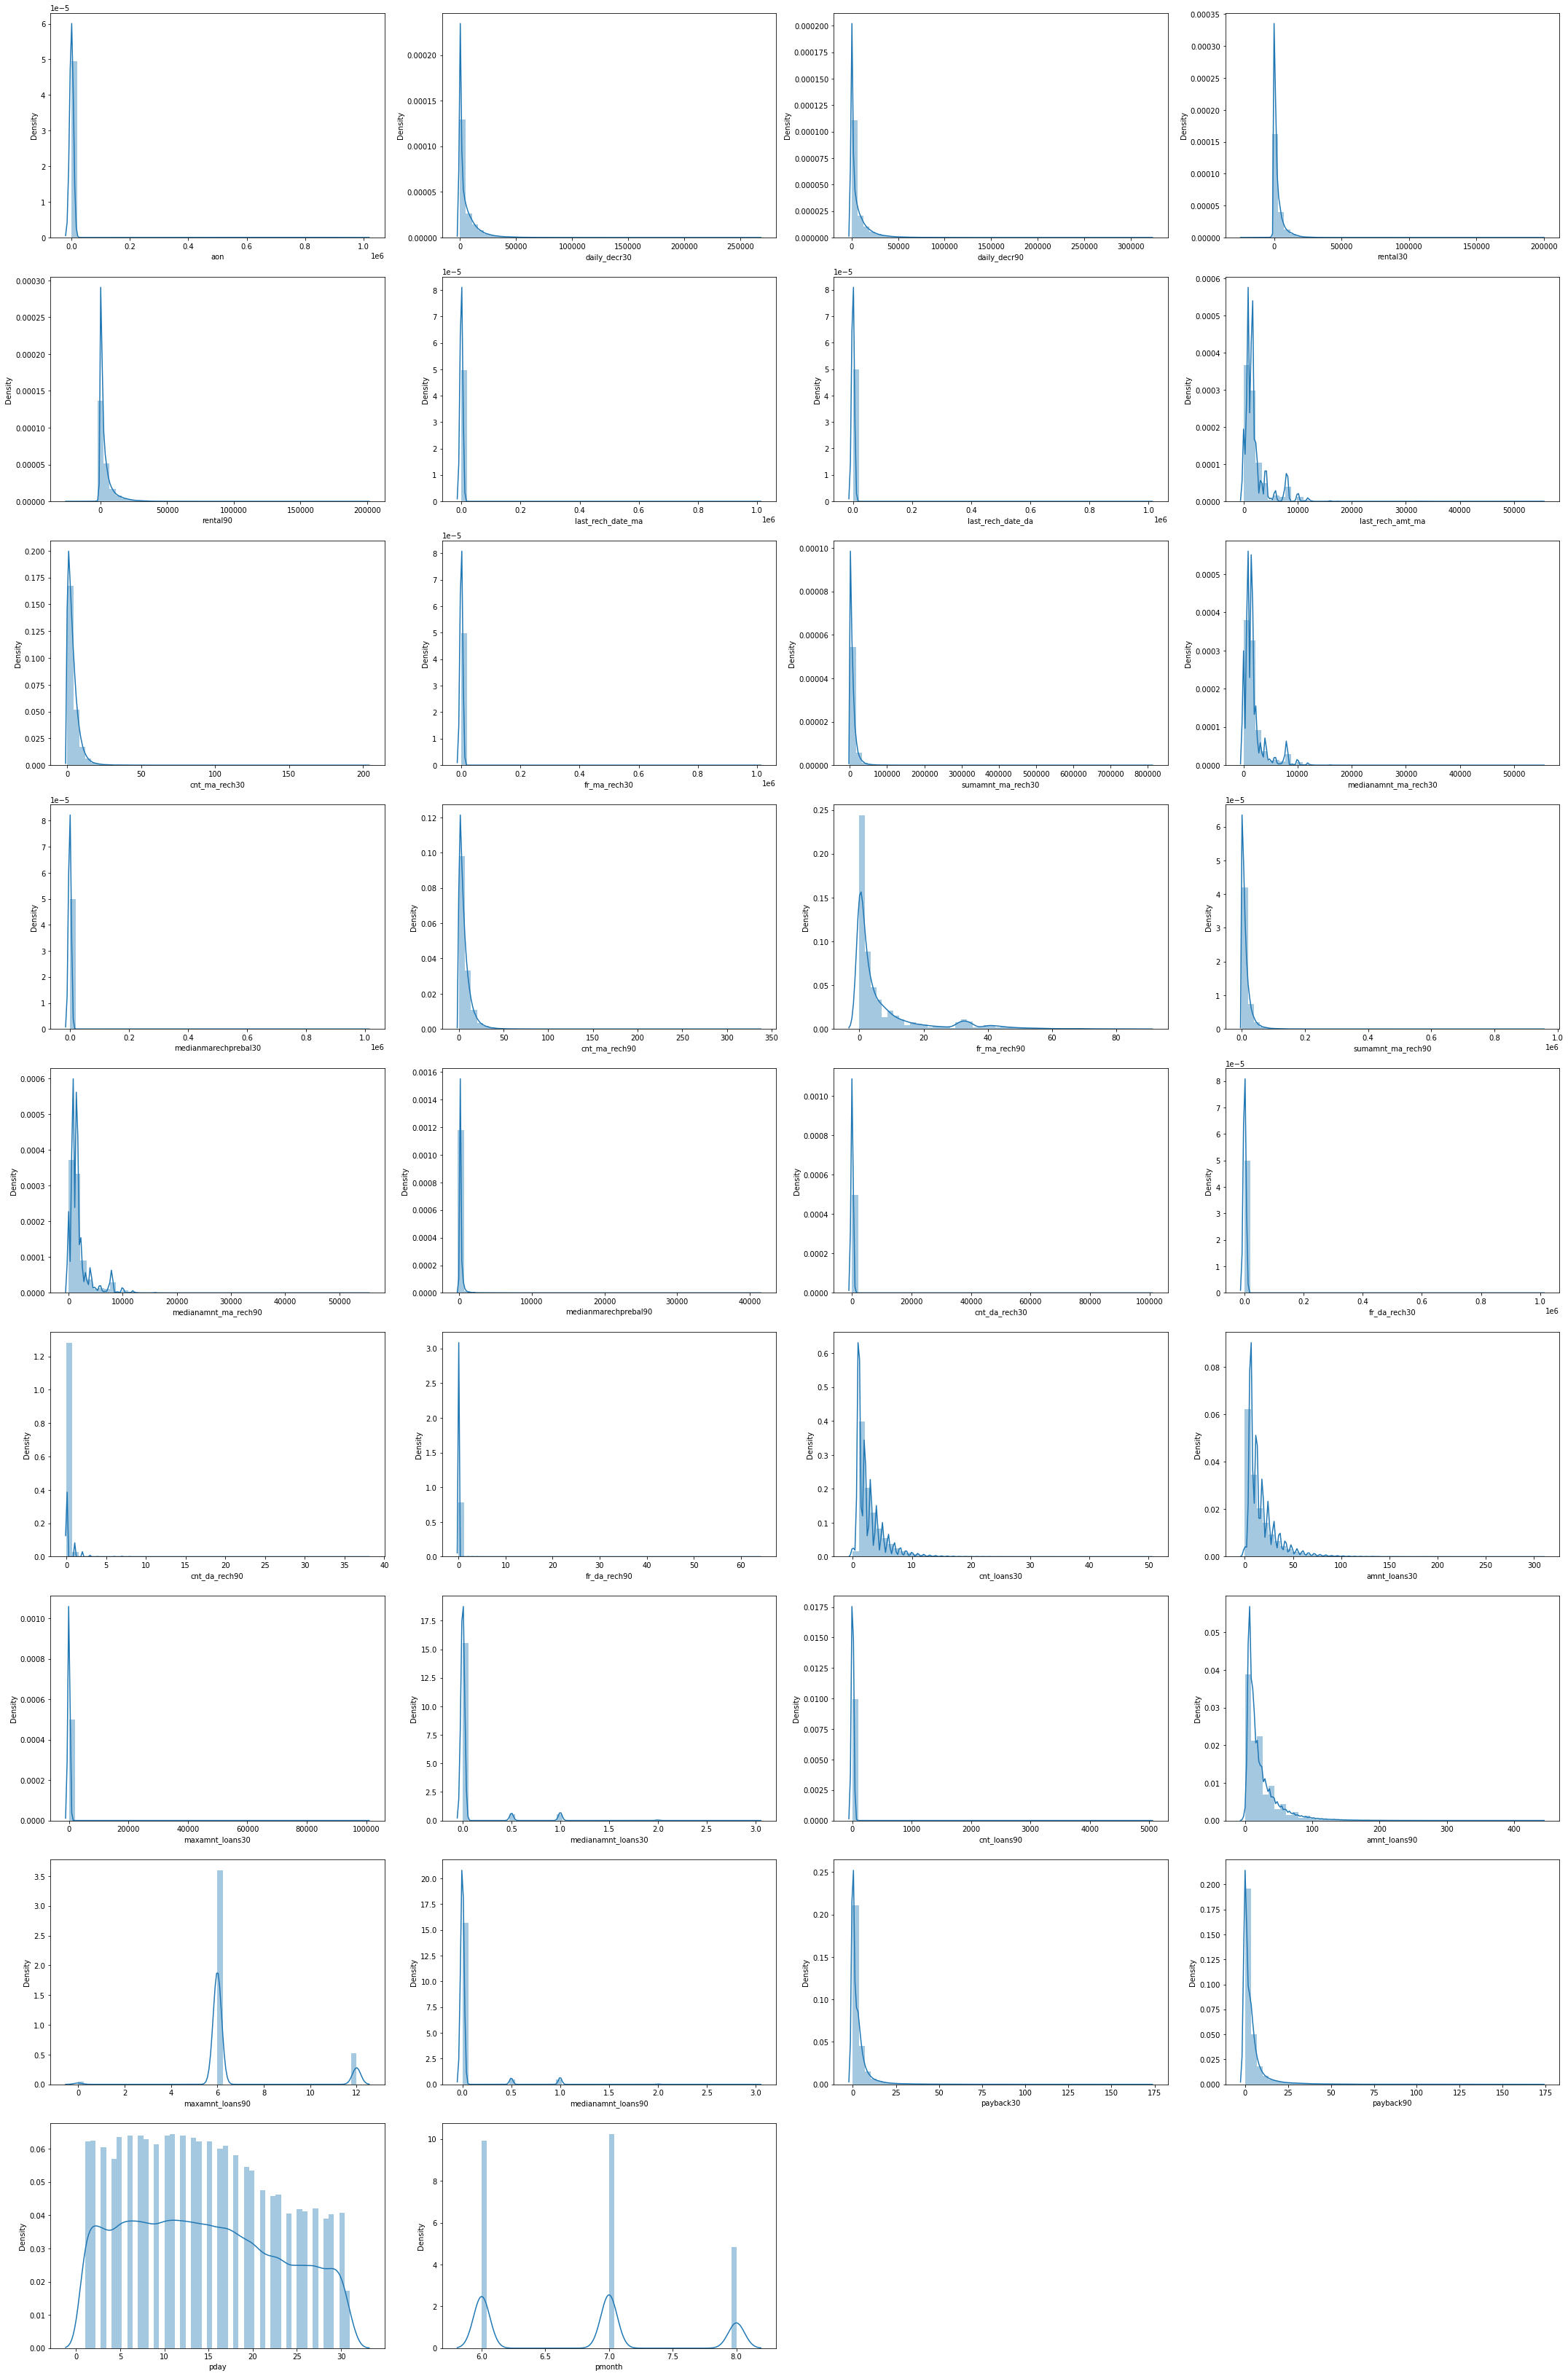

In [126]:
#Skewness of Numerical columns
plt.figure(figsize = [30,50])
for i in range(0,len(numeric_columns)):
    plt.subplot(10,4,i+1)
    sns.distplot(data[numeric_columns[i]])
    plt.tight_layout()

Observations:
    
* None of the columns are having normal distribution of data.
* All the columns except the columns ['pday', 'pmonth'] are having skewness and they are right skewed.

### Checking the Presence of Outliers in Data

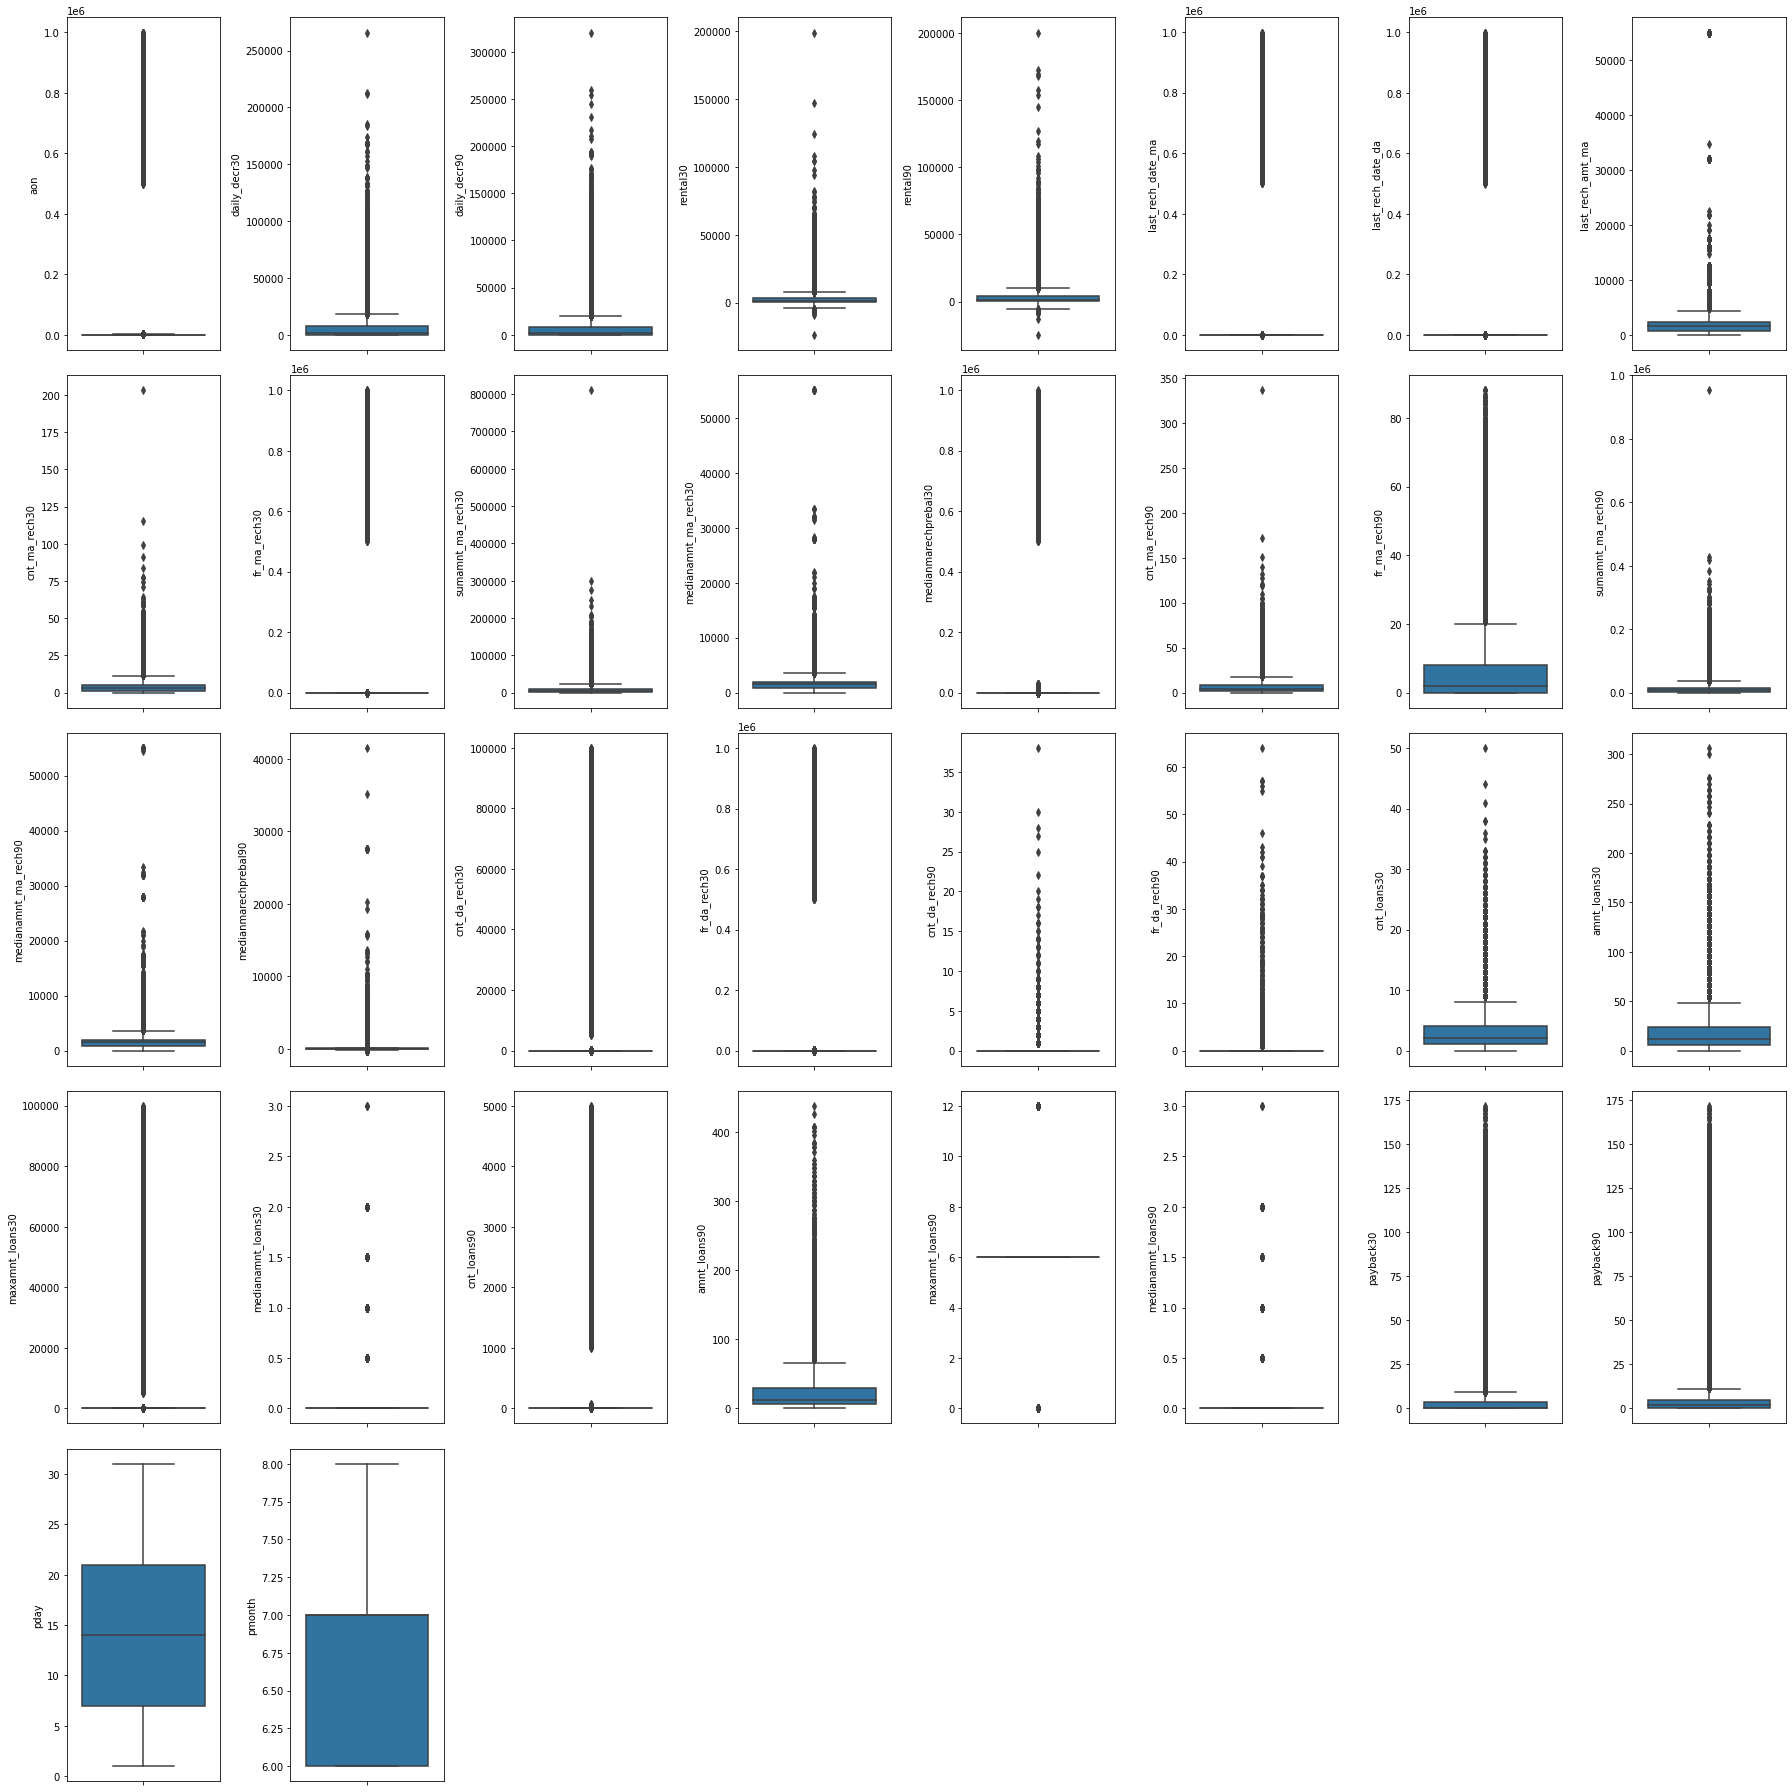

In [123]:
#Plotting the data of numerical columns with boxplot to check the outliers
plt.figure(figsize = [25,20])
for i in range(0,len(numeric_columns)):
    plt.subplot(5,8,i+1)
    sns.boxplot(y = data[numeric_columns[i]])
    plt.tight_layout()

Observations:
    
* All the columns except the columns ['pday', 'pmonth'] are having extreme outliers. We can handle these outliers in later step.

### Checking whether the data is balanced or not

In [15]:
x = data.drop('label',axis = 1)
y = data['label']
print(x.shape)
print(y.shape)

(209593, 34)
(209593,)


1    183431
0     26162
Name: label, dtype: int64


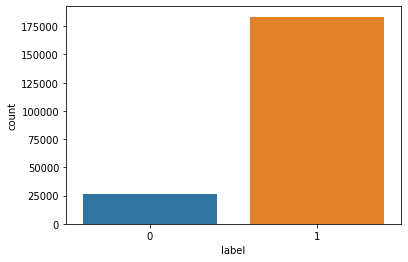

In [19]:
sns.countplot(y)
print(y.value_counts())
plt.show()

The data is not balanced and the records for non-defaulters is provided more in the datatset. We can balance the data using SMOTE oversampling technique.

In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
xtrainw, ytrainw = sm.fit_resample(x,y)
ytrainw

0         0
1         1
2         1
3         1
4         1
         ..
366857    0
366858    0
366859    0
366860    0
366861    0
Name: label, Length: 366862, dtype: int64

0    183431
1    183431
Name: label, dtype: int64


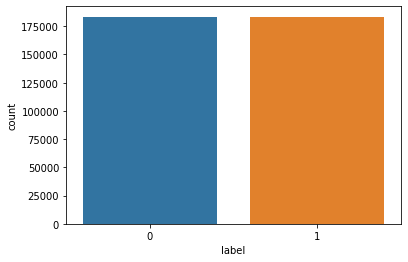

In [136]:
sns.countplot(ytrainw)
print(ytrainw.value_counts())

Now the data is balanced.

In [21]:
print(xtrainw.shape)
print(ytrainw.shape)

(366862, 34)
(366862,)


### Removing the Skewness

In [22]:
x = xtrainw.copy()
y = ytrainw.copy()
c = x.columns
print(x.shape)
print(y.shape)

(366862, 34)
(366862,)


#### Scaling the data before removing the skewness.

In [23]:
#Scaling the data using standardscaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x = pd.DataFrame(x,columns = c)

In [26]:
#We can set the skewness standard limit as +/-0.5.
import numpy as np
pd.set_option('display.max_rows', None)
print(x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5])
pd.set_option('display.max_rows', 10)

medianmarechprebal90    48.347264
cnt_da_rech90           29.483369
fr_da_rech90            26.973883
cnt_da_rech30           18.393976
maxamnt_loans30         17.689638
cnt_loans90             17.329859
last_rech_date_ma       15.237613
last_rech_date_da       15.235791
fr_ma_rech30            14.883726
fr_da_rech30            14.795784
medianmarechprebal30    14.147435
aon                     10.184935
payback30                7.924933
sumamnt_ma_rech30        6.808677
payback90                6.635743
sumamnt_ma_rech90        5.581036
medianamnt_loans90       5.382868
daily_decr90             5.295641
medianamnt_loans30       5.106100
medianamnt_ma_rech90     5.035056
last_rech_amt_ma         5.032946
medianamnt_ma_rech30     4.893905
daily_decr30             4.864494
rental90                 4.569817
rental30                 4.469727
cnt_ma_rech90            3.926851
amnt_loans90             3.925306
amnt_loans30             3.649607
cnt_ma_rech30            3.628347
cnt_loans30   

These are the columns which are having skewness which is beyond the standard limit. We can reduce the skewness of these columns.

In [27]:
from sklearn.preprocessing import power_transform
#user defined function for removing skewness for columns which are beyond standard range
def rskew(col):
    x[col]=power_transform((x[col].values.reshape(-1,1)))

In [28]:
rskew('medianmarechprebal90')
rskew('cnt_da_rech90')
rskew('fr_da_rech90')
rskew('cnt_da_rech30')
rskew('maxamnt_loans30')
rskew('cnt_loans90')
rskew('last_rech_date_ma')
rskew('last_rech_date_da')
rskew('fr_ma_rech30')
rskew('fr_da_rech30')
rskew('medianmarechprebal30')
rskew('aon')
rskew('payback30')
rskew('sumamnt_ma_rech30')
rskew('payback90')
rskew('sumamnt_ma_rech90')
rskew('medianamnt_loans90')
rskew('daily_decr90')
rskew('medianamnt_loans30')
rskew('medianamnt_ma_rech90')
rskew('last_rech_amt_ma')
rskew('daily_decr30')
rskew('medianamnt_ma_rech30')
rskew('rental90')
rskew('rental30')
rskew('cnt_ma_rech90')
rskew('amnt_loans90')
rskew('amnt_loans30')
rskew('cnt_ma_rech30')
rskew('cnt_loans30')
rskew('fr_ma_rech90')
rskew('maxamnt_loans90')
rskew('pmonth')

In [29]:
pd.set_option('display.max_rows', None)
print(x.skew().sort_values(ascending=False)[np.abs(x.skew())>0.5])
pd.set_option('display.max_rows', 10)

cnt_da_rech30           14.250933
last_rech_date_da       14.182069
fr_da_rech30            14.059198
fr_ma_rech30            13.980890
last_rech_date_ma       13.520572
fr_da_rech90            13.193334
maxamnt_loans30         11.546658
cnt_da_rech90            7.219980
medianmarechprebal30     5.882659
medianamnt_loans90       3.644405
medianamnt_loans30       3.439046
aon                      3.363674
cnt_loans90              1.826857
payback30                0.851797
payback90                0.773528
daily_decr90             0.770063
daily_decr30             0.730091
fr_ma_rech90             0.712834
amnt_loans90             0.524995
medianmarechprebal90    -0.947650
maxamnt_loans90         -2.463833
rental90                -3.360905
rental30                -5.125275
dtype: float64


We can see that the columns ['cnt_da_rech30', 'fr_ma_rech30','fr_da_rech30', 'last_rech_date_da', 'last_rech_date_ma', 'fr_da_rech90', 'maxamnt_loans30', 'cnt_da_rech90', 'medianmarechprebal30', 'medianamnt_loans90', 'medianamnt_loans30', 'aon', 'cnt_loans90', 'payback30', 'payback90', 'daily_decr90', 'daily_decr30', 'fr_ma_rech90', 'amnt_loans90', 'medianmarechprebal90', 'maxamnt_loans90', 'rental90', 'rental30'] are having skewness beyond standard limit. The columns ['cnt_da_rech30', 'fr_ma_rech30','fr_da_rech30', 'last_rech_date_da', 'last_rech_date_ma', 'fr_da_rech90', 'maxamnt_loans30'] are having high skewness. So, we can drop these columns from the dataset as these columns can have biased impact on the output. 

In [30]:
data.drop(['cnt_da_rech30', 'fr_ma_rech30','fr_da_rech30', 'last_rech_date_da', 'last_rech_date_ma', 'fr_da_rech90', 'maxamnt_loans30'], axis = 1, inplace= True)

In [31]:
x.drop(['cnt_da_rech30', 'fr_ma_rech30','fr_da_rech30', 'last_rech_date_da', 'last_rech_date_ma', 'fr_da_rech90', 'maxamnt_loans30'], axis = 1, inplace= True)

### Removing the Outliers

#### Using ZScore method

In [32]:
from scipy.stats import zscore
df = x.copy()
df['label'] = y.copy()
z = np.abs(zscore(df))
z

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,label
0,0.581964,0.707784,0.648930,0.797290,0.802827,0.387238,0.136554,0.034466,0.520748,0.362172,0.223195,1.668035,0.307343,0.447018,0.558995,0.135945,0.574476,0.394096,0.270275,0.188523,0.139258,0.192745,0.256898,2.015995,1.994365,0.756060,0.669971,1.0
1,0.141030,1.705544,1.693958,0.976759,0.818313,1.732564,0.463326,0.676080,1.845859,0.034315,0.697481,0.858067,0.252735,1.823886,0.357841,0.135945,0.725102,0.394096,0.270275,0.672507,0.139258,2.514903,0.256898,0.720221,0.770368,0.530720,1.722832,1.0
2,0.141114,0.019854,0.024157,0.275799,0.374122,0.387238,0.463326,0.493634,0.520748,0.002603,0.697481,0.858067,0.705398,0.447018,0.431314,0.135945,0.725102,0.818544,0.270275,0.672507,0.875357,0.192745,0.256898,0.720221,0.770368,0.627382,1.722832,1.0
3,0.635688,0.851459,0.840004,0.848710,0.876353,0.163371,1.247652,1.158990,1.365233,0.409028,0.697481,0.858067,0.875273,0.118686,0.662167,0.135945,0.574476,0.394096,0.270275,0.188523,0.139258,0.192745,0.256898,0.720221,0.770368,1.045432,1.015496,1.0
4,0.498399,0.755969,0.751667,0.141610,0.254078,0.855987,1.402508,1.714848,0.970656,0.229126,1.173846,0.127009,1.544434,1.162718,0.047144,0.135945,1.805366,1.748890,0.270275,1.609727,1.595912,0.192745,0.256898,0.762181,0.482962,1.013417,1.015496,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,0.920817,0.867723,0.855029,0.050909,0.079665,1.467626,1.247652,1.158990,1.365233,0.409028,1.264587,0.858067,1.167366,1.492734,0.714977,0.135945,0.725102,0.818544,0.270275,0.672507,0.875357,0.192745,0.256898,0.720221,0.770368,0.370026,1.015496,1.0
366858,0.592047,0.846556,0.835474,0.880610,0.903930,0.855987,0.463326,0.213177,0.970656,0.071336,0.697481,0.858067,0.498553,0.919359,0.268835,0.135945,0.574476,0.756209,0.270275,0.051839,0.493694,0.192745,0.256898,0.985718,0.703644,2.042841,1.015496,1.0
366859,0.656111,0.857319,0.845418,1.034723,1.036694,0.857420,0.463326,0.212102,0.972111,0.269625,0.697481,0.858067,0.497778,0.920876,0.269887,0.135945,0.725102,0.818544,3.727055,0.672507,0.875357,0.192745,3.918279,0.720221,0.770368,0.530720,1.015496,1.0
366860,0.141162,0.866251,0.853670,0.978421,0.988278,0.362124,0.463326,0.806726,0.221905,0.094688,0.697481,0.858067,0.927041,0.325959,0.641330,0.135945,0.725102,0.818544,0.270275,0.672507,0.875357,0.192745,0.256898,0.720221,0.770368,1.270773,1.015496,1.0


In [158]:
threshold = 3
df_new = df.drop('label', axis = 1)[(z<3).all(axis=1)]
df_new['label'] = y.copy()
df_new

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,amnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,label
0,-0.583473,0.707992,0.649078,-0.797556,-0.802510,0.389229,0.136484,0.035131,0.522721,-0.358209,-0.222472,1.669544,-0.306261,0.449264,-0.558220,-0.13606,0.573177,0.393948,-0.269502,-0.187790,0.139370,-0.191665,-0.256362,2.016193,1.994601,0.755517,0.668510,0
1,0.138114,1.705686,1.694079,0.978427,0.819772,1.732164,-0.462857,0.676391,1.845062,-0.037165,-0.696471,-0.858102,0.253478,1.823711,0.358129,-0.13606,-0.725537,0.393948,-0.269502,-0.674143,0.139370,2.520980,-0.256362,-0.720432,-0.770623,-0.531003,1.723556,1
2,-0.143498,0.019945,-0.024094,-0.274925,-0.373169,0.389229,-0.462857,-0.492622,0.522721,-0.006100,-0.696471,-0.858102,-0.704084,0.449264,0.431592,-0.13606,-0.725537,-0.818373,-0.269502,-0.674143,-0.875012,-0.191665,-0.256362,-0.720432,-0.770623,0.626865,1.723556,1
3,-0.637087,-0.851544,-0.840059,-0.849101,-0.876156,-0.161068,-1.246326,-1.157546,-1.363170,-0.404071,-0.696471,-0.858102,-0.873863,-0.116138,-0.661312,-0.13606,0.573177,0.393948,-0.269502,-0.187790,0.139370,-0.191665,-0.256362,-0.720432,-0.770623,-1.045611,-1.016432,1
4,0.494842,-0.756033,-0.751707,-0.140491,-0.252974,0.857410,1.402057,1.714176,0.971730,-0.227957,1.173817,-0.124934,1.544252,1.164044,-0.046706,-0.13606,1.804854,1.748557,-0.269502,1.613225,1.595688,-0.191665,-0.256362,0.761785,0.484971,1.012822,-1.016432,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,0.284123,-0.254027,-0.272298,-0.074124,0.010963,-0.359779,-0.462857,-0.805508,-0.219420,0.269309,0.714246,1.648522,0.107798,-0.323395,0.639595,-0.13606,-0.725537,-0.818373,-0.269502,0.108574,0.493721,-0.191665,-0.256362,-0.720432,0.363658,-0.145047,0.668510,0
366858,0.374592,0.974961,0.919857,0.663568,0.567736,0.123643,-0.462857,-0.615305,0.265240,-0.315816,-0.222472,1.878033,-0.278966,0.493338,-0.086992,-0.13606,-0.725537,-0.121856,-0.269502,-0.378246,-0.312478,-0.191665,-0.256362,-0.720432,1.742883,-0.016395,0.668510,0
366859,0.460987,-0.444069,-0.427716,1.438896,1.294000,1.735450,-1.246326,-1.157546,-1.363170,-0.404071,-0.696471,-0.124934,0.487876,1.451932,2.920565,-0.13606,-0.725537,-0.818373,-0.269502,-0.674143,-0.875012,-0.191665,-0.256362,-0.720432,-0.770623,-0.016395,0.668510,0
366860,0.898318,-0.867550,-0.854844,-0.661774,-0.713609,-1.465495,-1.246326,-1.157546,-1.363170,-0.404071,-1.263232,-0.858102,-1.165797,-1.490672,-0.714081,-0.13606,-0.725537,-0.818373,-0.269502,-0.674143,-0.875012,-0.191665,-0.256362,-0.720432,-0.770623,-1.174263,-1.016432,0


In [159]:
print(df.shape)
print(df_new.shape)

(366862, 28)
(313315, 28)


In [160]:
data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
data_loss

14.595951611232561

We are losing 14.6% of data after removing outliers from the dataset using zscore outlier removal method.

#### Using IQR (Inter Quantile Range) method

In [161]:
# 1st quantile

Q1=x.quantile(0.25)

# 3rd quantile
Q3=x.quantile(0.75)

# IQR
df
IQR=Q3 - Q1
df_a = df.drop('label', axis = 1)
df_1=df_a[~((df_a < (Q1 - 1.5 * IQR)) |(df_a > (Q3 + 1.5 * IQR))).any(axis=1)]

In [163]:
df_1['label'] = y.copy()
df_1.shape

(234971, 28)

In [164]:
data_loss = (df.shape[0]-df_1.shape[0])/df.shape[0]*100
data_loss

35.95112058485207

#### Using the Percentile Method

In [33]:
#Removing outliers using percentile method
for cols in x:
    percentile = df[cols].quantile([0.01,0.98]).values
    df[cols][df[cols]<=percentile[0]]=percentile[0]
    df[cols][df[cols]>=percentile[1]]=percentile[1]

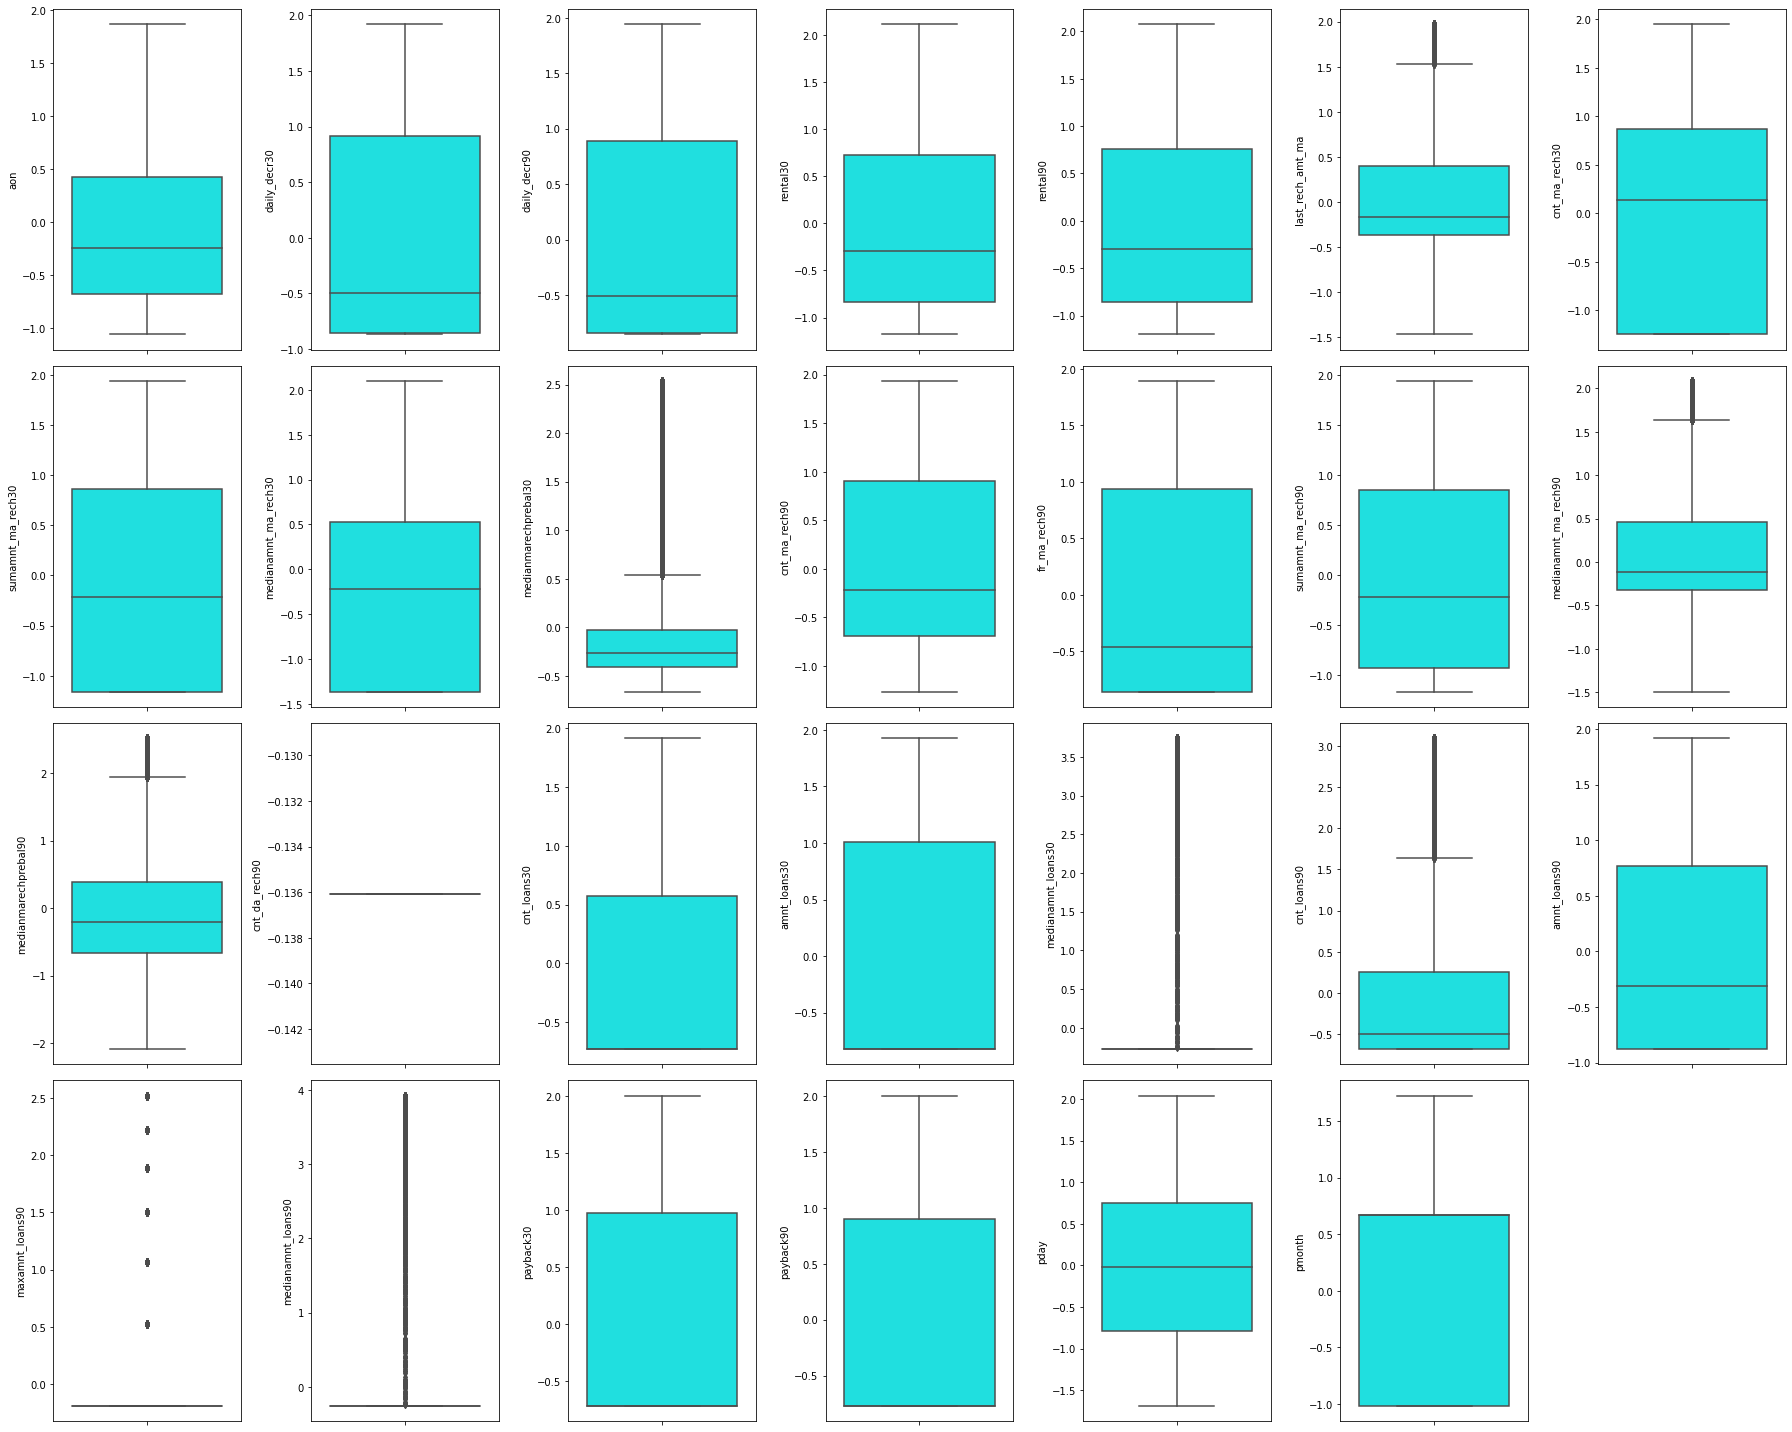

In [176]:
#Plotting the data of numerical columns with boxplot to check the outliers
numeric_columns = x.columns
plt.figure(figsize = [25,20])
for i in range(0,len(numeric_columns)):
    plt.subplot(4,7,i+1)
    sns.boxplot(y = df[numeric_columns[i]], color = 'cyan')
    plt.tight_layout()

The outlier data has bee treated using percentile method without losing any records.

### Checking the Multicolinearity of variables in the dataframe

In [34]:
x = df.drop('label',axis = 1)
y = df['label']
print(x.shape)
print(y.shape)

(366862, 27)
(366862,)


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

#User defined function to calculate variance of inflation in dataset.
def calc_vif(x):
    vif = pd.DataFrame()
    vif['Column Name'] = x.columns
    vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif.sort_values(by ='VIF Factor', ascending = False))

In [36]:
pd.set_option('display.max_rows', None)
calc_vif(x)

,Column Name,VIF Factor
2,daily_decr90,364.610498
1,daily_decr30,353.927737
7,sumamnt_ma_rech30,41.884133
12,sumamnt_ma_rech90,41.085583
10,cnt_ma_rech90,36.975361
4,rental90,34.635480
6,cnt_ma_rech30,32.659896
17,amnt_loans30,32.192192
3,rental30,30.979052
20,amnt_loans90,24.875247


The columns ['daily_decr90', 'daily_decr30', 'sumamnt_ma_rech30', 'sumamnt_ma_rech90', 'cnt_ma_rech90', 'rental90', 'cnt_ma_rech30', 'amnt_loans30', 'rental30', 'amnt_loans90', 'cnt_loans30', 'medianamnt_ma_rech90'] are having high variance of inflation. So let's try dropping few columns and recalculate the VIF.

In [37]:
x1 = x.drop(['daily_decr30', 'sumamnt_ma_rech30','rental30', 'amnt_loans30'], axis = 1)
calc_vif(x1)

,Column Name,VIF Factor
7,cnt_ma_rech90,22.150680
16,amnt_loans90,17.519268
4,cnt_ma_rech30,13.423039
9,sumamnt_ma_rech90,12.098923
10,medianamnt_ma_rech90,10.616770
13,cnt_loans30,9.126118
3,last_rech_amt_ma,7.809966
15,cnt_loans90,6.250033
18,medianamnt_loans90,6.149689
14,medianamnt_loans30,6.149462


We have reduced the multicolinearity of variables upto an extend. Now we can proceed with the model building.

#### Final Dataset

In [38]:
df = x1.copy()
df['label'] = y.copy()
pd.set_option('display.max_rows',10)
df

,aon,daily_decr90,rental90,last_rech_amt_ma,cnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech90,cnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pday,pmonth,label
0,-0.581964,0.648930,-0.802827,0.387238,0.136554,0.520748,-0.362172,-0.223195,1.668035,-0.307343,0.447018,-0.558995,-0.135945,0.574476,-0.270275,-0.188523,0.139258,-0.192745,-0.256898,2.004502,1.994365,0.756060,0.669971,0
1,0.141030,1.693958,0.818313,1.732564,-0.463326,1.845859,-0.034315,-0.697481,-0.858067,0.252735,1.823886,0.357841,-0.135945,-0.725102,-0.270275,-0.672507,0.139258,2.514903,-0.256898,-0.720221,-0.770368,-0.530720,1.722832,1
2,-0.141114,-0.024157,-0.374122,0.387238,-0.463326,0.520748,-0.002603,-0.697481,-0.858067,-0.705398,0.447018,0.431314,-0.135945,-0.725102,-0.270275,-0.672507,-0.875357,-0.192745,-0.256898,-0.720221,-0.770368,0.627382,1.722832,1
3,-0.635688,-0.840004,-0.876353,-0.163371,-1.247652,-1.365233,-0.409028,-0.697481,-0.858067,-0.875273,-0.118686,-0.662167,-0.135945,0.574476,-0.270275,-0.188523,0.139258,-0.192745,-0.256898,-0.720221,-0.770368,-1.045432,-1.015496,1
4,0.498399,-0.751667,-0.254078,0.855987,1.402508,0.970656,-0.229126,1.173846,-0.127009,1.544434,1.162718,-0.047144,-0.135945,1.805366,-0.270275,1.609727,1.595912,-0.192745,-0.256898,0.762181,0.482962,1.013417,-1.015496,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,-0.920817,-0.855029,-0.079665,-1.467626,-1.247652,-1.365233,-0.409028,-1.264587,-0.858067,-1.167366,-1.492734,-0.714977,-0.135945,-0.725102,-0.270275,-0.672507,-0.875357,-0.192745,-0.256898,-0.720221,-0.770368,0.370026,-1.015496,0
366858,-0.592047,-0.835474,-0.903930,0.855987,-0.463326,0.970656,-0.071336,-0.697481,-0.858067,-0.498553,0.919359,0.268835,-0.135945,0.574476,-0.270275,0.051839,0.493694,-0.192745,-0.256898,0.985718,0.703644,2.042841,-1.015496,0
366859,-0.656111,-0.845418,-1.036694,0.857420,-0.463326,0.972111,-0.269625,-0.697481,-0.858067,-0.497778,0.920876,-0.269887,-0.135945,-0.725102,3.727055,-0.672507,-0.875357,-0.192745,3.918279,-0.720221,-0.770368,-0.530720,-1.015496,0
366860,0.141162,-0.853670,-0.988278,-0.362124,-0.463326,-0.221905,0.094688,-0.697481,-0.858067,-0.927041,-0.325959,0.641330,-0.135945,-0.725102,-0.270275,-0.672507,-0.875357,-0.192745,-0.256898,-0.720221,-0.770368,1.270773,-1.015496,0


### EDA Completed

### Building the Model

#### Splitting the data into features and target

In [39]:
features = df.drop('label',axis = 1)
target = df['label']
print(features.shape)
print(target.shape)

(366862, 23)
(366862,)


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [60]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
xgb = XGBClassifier()
lgbmc = LGBMClassifier()
cbc = CatBoostClassifier(verbose=0, n_estimators=100)

#### Finding the best random_state

In [48]:
#User defined function for finding the best random state
def best_ran(model):
    maxAcc = 0
    maxRs = 0
    print(model)
    for i in range(1,100):
        features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = i)
        model.fit(features_train,target_train)
        pred_test = model.predict(features_test)
        acc = accuracy_score(target_test,pred_test)
        if acc>maxAcc:
            maxAcc = acc
            maxRs = i
    print("At random state ",maxRs,"the model is having accuracy score of ", maxAcc)

#### Testing the model with best random state

In [51]:
#User defined Function for training and testing the model with best random state

def mod_test(model, ran):
    model
    print(model)
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    print("Accuracy Score is ",accuracy_score(target_test,pred_test))
    print(confusion_matrix(target_test,pred_test))
    print(classification_report(target_test,pred_test))

#### LogisticRegression

In [62]:
best_ran(lr)

LogisticRegression()
At random state  15 the model is having accuracy score of  0.7859839450479059


In [63]:
mod_test(lr,15)

LogisticRegression()
Accuracy Score is  0.7859839450479059
[[29833  6940]
 [ 8763 27837]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79     36773
           1       0.80      0.76      0.78     36600

    accuracy                           0.79     73373
   macro avg       0.79      0.79      0.79     73373
weighted avg       0.79      0.79      0.79     73373



#### DecisionTreeClassifier

In [55]:
best_ran(dtc)

DecisionTreeClassifier()
At random state  95 the model is having accuracy score of  0.9061371349133878


In [64]:
mod_test(dtc,95)

DecisionTreeClassifier()
Accuracy Score is  0.9055783462581604
[[33592  3203]
 [ 3725 32853]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     36795
           1       0.91      0.90      0.90     36578

    accuracy                           0.91     73373
   macro avg       0.91      0.91      0.91     73373
weighted avg       0.91      0.91      0.91     73373



#### XGBClassifier

In [57]:
best_ran(xgb)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
At random state  36 the model is having accuracy score of  0.9355212407833945


In [65]:
mod_test(xgb,36)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
Accuracy Score is  0.9355212407833945
[[34074  2585]
 [ 2146 34568]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     36659
           1       0.93      0.94      0.94     36714

    accuracy              

#### LGBMClassifier


In [58]:
best_ran(lgbmc)

LGBMClassifier()
At random state  36 the model is having accuracy score of  0.9272211849045289


In [66]:
mod_test(lgbmc,36)

LGBMClassifier()
Accuracy Score is  0.9272211849045289
[[33695  2964]
 [ 2376 34338]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     36659
           1       0.92      0.94      0.93     36714

    accuracy                           0.93     73373
   macro avg       0.93      0.93      0.93     73373
weighted avg       0.93      0.93      0.93     73373



#### CatBoostClassifier

In [61]:
best_ran(cbc)

At random state  74 the model is having accuracy score of  0.9334632630531667


In [67]:
mod_test(cbc,74)

Accuracy Score is  0.9334632630531667
[[33945  2639]
 [ 2243 34546]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93     36584
           1       0.93      0.94      0.93     36789

    accuracy                           0.93     73373
   macro avg       0.93      0.93      0.93     73373
weighted avg       0.93      0.93      0.93     73373



After testing the models, the xgb classifier(xgb) is performing well by providing the maximum accuracy score of 93.55%.

Now let's check the cross validation for each models to find the best performing model.

### Cross Validation

In [68]:
#User defined function for checking cross validation for each model
from sklearn.model_selection import cross_val_score

def cross_val(model,ran):    #ran = random_state
    cv_mean = 0
    cv_fold = 0
    features_train, features_test, target_train, target_test = train_test_split(features,target,test_size = 0.20, random_state = ran)
    model.fit(features_train,target_train)
    pred_test = model.predict(features_test)
    for j in range(2,5):
        cv_score = cross_val_score(model,features, target, cv = j)
        a =cv_score.mean()
        if a>cv_mean:
            cv_mean = a
            cv_fold = j
    print(model)
    print("At cv fold",cv_fold," the cv score is ", cv_mean, "and the Accuracy Score  is ",accuracy_score(target_test,pred_test))

#### LogisticRegression

In [69]:
cross_val(lr,15)

LogisticRegression()
At cv fold 4  the cv score is  0.7816590794547977 and the Accuracy Score  is  0.7859839450479059


#### DecisionTreeClassifier

In [70]:
cross_val(dtc,95)

DecisionTreeClassifier()
At cv fold 4  the cv score is  0.8985968400822768 and the Accuracy Score  is  0.9066005206274788


#### XGBClassifier

In [71]:
cross_val(xgb,36)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
At cv fold 4  the cv score is  0.9258223768870628 and the Accuracy Score  is  0.9355212407833945


#### LGBMClassifier


In [72]:
cross_val(lgbmc,36)

LGBMClassifier()
At cv fold 3  the cv score is  0.9197056224400632 and the Accuracy Score  is  0.9272211849045289


#### CatBoostClassifier

In [73]:
cross_val(cbc,74)

At cv fold 4  the cv score is  0.9243395300600212 and the Accuracy Score  is  0.9334632630531667


After training, testing and cross validations, the XGB Classifer(xgb) is performing well and providing maximum accuracy score of 93.55% with a cross validation mean score of 92.59% for 4 cross validations.

In [74]:
xgb = XGBClassifier()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 36)
xgb.fit(features_train, target_train)
pred_test_xgb = xgb.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test_xgb))
print(confusion_matrix(target_test,pred_test_xgb))
print(classification_report(target_test,pred_test_xgb))
cv_score = cross_val_score(xgb,features, target, cv = 4)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

Accuracy Score is  0.9355212407833945
[[34074  2585]
 [ 2146 34568]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     36659
           1       0.93      0.94      0.94     36714

    accuracy                           0.94     73373
   macro avg       0.94      0.94      0.94     73373
weighted avg       0.94      0.94      0.94     73373

CV score is  0.9258223768870628


### AUC ROC Curve

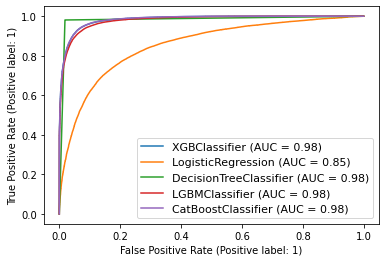

In [76]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve 

curve = plot_roc_curve(xgb,features_test,target_test)
plot_roc_curve(lr,features_test,target_test, ax=curve.ax_)
plot_roc_curve(dtc,features_test,target_test, ax=curve.ax_)
plot_roc_curve(lgbmc,features_test,target_test, ax=curve.ax_)
plot_roc_curve(cbc,features_test,target_test, ax=curve.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

We can see all the models except logistic regresion model is providing the maximum AUC ROC score. Since the XGB model is performing well with all the training, testing, cross validations and auc score, we can consider this model as the best peforming model.

### Hyperparameter Tuning

In [79]:
from sklearn.model_selection import GridSearchCV
parameters = {'booster':['gbtree','dart'],
             'max_depth': [5,6],
             'n_estimators':[100,125],
             'learning_rate':[2,3]}

grid = GridSearchCV(estimator = XGBClassifier(),param_grid=parameters, cv = 4)

In [80]:
grid.fit(features,target)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             param_grid={'booster': ['gbtree', 'dart'], 'learning_rate': [2, 3],
                         'max_depth': [5, 6], 'n_estimators': [100, 125]})

In [81]:
grid.best_score_

0.6762431787628769

In [82]:
grid.best_params_

{'booster': 'gbtree', 'learning_rate': 3, 'max_depth': 6, 'n_estimators': 100}

The hyper parameter tuning didn't improve the score.

Accuracy Score is  0.9355212407833945
[[34074  2585]
 [ 2146 34568]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.94     36659
           1       0.93      0.94      0.94     36714

    accuracy                           0.94     73373
   macro avg       0.94      0.94      0.94     73373
weighted avg       0.94      0.94      0.94     73373

CV score is  0.9258223768870628


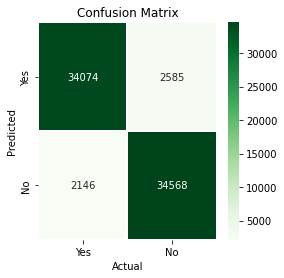

In [86]:
xgb = XGBClassifier()
features_train, features_test,target_train,target_test= train_test_split(features,target,test_size = 0.20, random_state = 36)
xgb.fit(features_train, target_train)
pred_test_xgb = xgb.predict(features_test)
print("Accuracy Score is ",accuracy_score(target_test,pred_test_xgb))
print(confusion_matrix(target_test,pred_test_xgb))
print(classification_report(target_test,pred_test_xgb))
cv_score = cross_val_score(xgb,features, target, cv = 4)
cv_mean =cv_score.mean()
print('CV score is ', cv_mean)

cm = confusion_matrix(target_test, pred_test_xgb)

x_labels = ["Yes","No"]
y_labels = ["Yes","No"]

f, ax = plt.subplots(figsize =(4,4))
sns.heatmap(cm, annot = True, linewidths=0.2, fmt = ".0f", ax=ax, cmap="Greens", xticklabels=x_labels, yticklabels=y_labels)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title('Confusion Matrix')
plt.show()

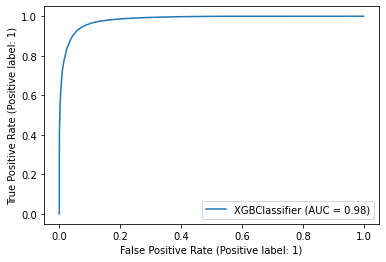

In [87]:
plot_roc_curve(xgb,features_test,target_test)
plt.show()

### After all the tests, cross validations and tuning the XGB classifier(xgb) model is performing well and providing maximum accuracy score of 93.55%.

### Saving the Best Model

In [88]:
import pickle

filename = 'micro credit defaulter prediction_model.pkl'
pickle.dump(xgb,open(filename,'wb'))

### Conclusion

In [89]:
original = np.array(target_test)
predicted = np.round(np.array(xgb.predict(features_test)))

prediction_test = pd.DataFrame({'Original Label':original,'Predicted Label':predicted})
prediction_test.sample(20)

,Original Label,Predicted Label
10014,0,0
52811,1,1
70398,0,0
25985,0,0
44411,1,1
...,...,...
46466,1,1
24818,1,1
57957,1,1
33634,1,1


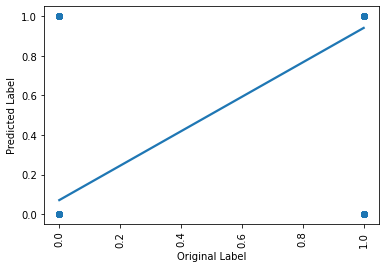

In [90]:
sns.regplot('Original Label','Predicted Label', data = prediction_test)
plt.xticks(rotation = 90)
plt.show()

Our model is performing well with predictions and provided accurate results.

Now this model can be used to predict whether a customer will be a defaulter or non-defaulter of credit repayment based on the following features:
        `cnt_ma_rech90`    `amnt_loans90`    `cnt_ma_rech30`    `sumamnt_ma_rech90`    `medianamnt_ma_rech90`    `cnt_loans30`    `last_rech_amt_ma`    `cnt_loans90`    `medianamnt_loans90`    `medianamnt_loans30`    `payback30`    `payback90`    `medianamnt_ma_rech30`    `daily_decr90`    `pmonth`    `medianmarechprebal90`    `medianmarechprebal30`    `rental90`    `maxamnt_loans90`    `fr_ma_rech90`    `pday`    `cnt_da_rech90`    `aon`

### Impact of Variables on Target Variable(Correlation)

* Most of the columns are having positive correlation to the target variable.
* The columns ['fr_da_rech30', 'aon', 'medianmarechprebal30', 'fr_da_rech90'] are having negative correlation to the target variable 'label'. Rest of the variables are having positive correlation to the target variable.
* The column 'cnt_ma_rech30' is having highest positive correlation to the target variable 'label', while the column 'maxamnt_loans30' is having least positive correlation to the target variable 'label'.
* The column 'fr_da_rech30' is having the least negative correlation to the target variable 'label', while the column 'fr_da_rech90' is having the highest negative correlation to the target variable 'label'.

### Micro Credit Defaulter prediction model created